<a href="https://colab.research.google.com/github/olusegunajibola/stats_learning/blob/main/ClassificationAlgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Files/Intro_to_Stats_Learning_Univaq/Assignment2')
# !ls

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.facecolor'] = "0.92"


In [ ]:
!ls

 ClassificationAlgos.ipynb   SecondAssignment_20_05_2022.pdf
'Impt Links to Solns.gdoc'   SecondAssignment.m
 mike.ipynb		    'Untitled spreadsheet.gsheet'
 OJ.csv


# Data Wrangling & Analysis

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

In [ ]:
# oj2 = pd.read_csv('OJ.csv')
oj = pd.read_csv('OJ.csv')

In [ ]:
oj

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0          CH             237        1     1.75     1.99    0.00    0.00   
1          CH             239        1     1.75     1.99    0.00    0.30   
2          CH             245        1     1.86     2.09    0.17    0.00   
3          MM             227        1     1.69     1.69    0.00    0.00   
4          CH             228        7     1.69     1.69    0.00    0.00   
...       ...             ...      ...      ...      ...     ...     ...   
1065       CH             252        7     1.86     2.09    0.10    0.00   
1066       CH             256        7     1.86     2.18    0.00    0.00   
1067       MM             257        7     1.86     2.18    0.00    0.00   
1068       CH             261        7     1.86     2.13    0.00    0.24   
1069       CH             270        1     1.86     2.18    0.00    0.00   

      SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0             0          0  0.500000         1.99         1.75       0.24   
1             0          1  0.600000         1.69         1.75      -0.06   
2             0          0  0.680000         2.09         1.69       0.40   
3             0          0  0.400000         1.69         1.69       0.00   
4             0          0  0.956535         1.69         1.69       0.00   
...         ...        ...       ...          ...          ...        ...   
1065          0          0  0.587822         2.09         1.76       0.33   
1066          0          0  0.670258         2.18         1.86       0.32   
1067          0          0  0.736206         2.18         1.86       0.32   
1068          0          0  0.588965         1.89         1.86       0.03   
1069          0          0  0.671172         2.18         1.86       0.32   

     Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0        No   0.000000   0.000000           0.24      1  
1        No   0.150754   0.000000           0.24      1  
2        No   0.000000   0.091398           0.23      1  
3        No   0.000000   0.000000           0.00      1  
4       Yes   0.000000   0.000000           0.00      0  
...     ...        ...        ...            ...    ...  
1065    Yes   0.000000   0.053763           0.23      0  
1066    Yes   0.000000   0.000000           0.32      0  
1067    Yes   0.000000   0.000000           0.32      0  
1068    Yes   0.112676   0.000000           0.27      0  
1069     No   0.000000   0.000000           0.32      1  

[1070 rows x 18 columns]

In [ ]:
oj.Purchase.unique()

array(['CH', 'MM'], dtype=object)

Our desired response variable is of just two types: `CH` and `MM`. As a result, we can translate it to become:

`CH = 0` and `MM = 1`, this makes it machine readable. We can also apply this to the `Store7` column - `No = 0` and `Yes = 1`, this time around we strictly make it (`Store7`) into a categorical variable by adding two more columns to our dataset.

In [ ]:
oj.head(10)

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   
5       CH             230        7     1.69     1.99    0.00     0.0   
6       CH             232        7     1.69     1.99    0.00     0.4   
7       CH             234        7     1.75     1.99    0.00     0.4   
8       CH             235        7     1.75     1.99    0.00     0.4   
9       CH             238        7     1.75     1.99    0.00     0.4   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   
5          0          1  0.965228         1.99         1.69       0.30    Yes   
6          1          1  0.972182         1.59         1.69      -0.10    Yes   
7          1          0  0.977746         1.59         1.75      -0.16    Yes   
8          0          0  0.982197         1.59         1.75      -0.16    Yes   
9          0          0  0.985757         1.59         1.75      -0.16    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0  
5   0.000000   0.000000           0.30      0  
6   0.201005   0.000000           0.30      0  
7   0.201005   0.000000           0.24      0  
8   0.201005   0.000000           0.24      0  
9   0.201005   0.000000           0.24      0

In [ ]:
oj.Store7.unique(), oj.Store7.unique().shape

(array(['No', 'Yes'], dtype=object), (2,))

In [ ]:
storeid = oj['StoreID'].value_counts()
storeid = pd.DataFrame(storeid)
storeid.reset_index(inplace=True)

In [ ]:
storeid.rename(columns ={'StoreID':'count', 'index' : 'StoreID'}, inplace = True)
storeid

StoreID  count
0        7    356
1        2    222
2        3    196
3        1    157
4        4    139

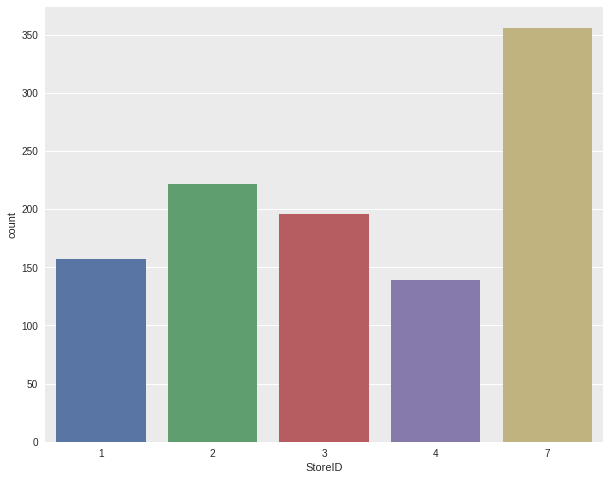

In [ ]:
sns.barplot(data = storeid, y = 'count', x='StoreID' )

In [ ]:
oj.StoreID.unique(), oj.StoreID.unique().shape

(array([1, 7, 2, 3, 4]), (5,))

In [ ]:
oj.WeekofPurchase.unique(), oj.WeekofPurchase.unique().shape

(array([237, 239, 245, 227, 228, 230, 232, 234, 235, 238, 240, 263, 276,
        268, 278, 269, 254, 257, 258, 259, 264, 271, 272, 274, 246, 265,
        275, 251, 256, 277, 229, 233, 236, 244, 247, 248, 249, 252, 260,
        266, 267, 270, 255, 273, 242, 241, 243, 253, 261, 231, 250, 262]),
 (52,))

In [ ]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

Fortunately for us, our dataset has no missing values. We now proceed with the recommendation we stated earlier regarding changing the text to numbers and converting some columns to categorical variables as well.

In [ ]:
oj.describe()

WeekofPurchase      StoreID      PriceCH      PriceMM       DiscCH  \
count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean       254.381308     3.959813     1.867421     2.085411     0.051860   
std         15.558286     2.308984     0.101970     0.134386     0.117474   
min        227.000000     1.000000     1.690000     1.690000     0.000000   
25%        240.000000     2.000000     1.790000     1.990000     0.000000   
50%        257.000000     3.000000     1.860000     2.090000     0.000000   
75%        268.000000     7.000000     1.990000     2.180000     0.000000   
max        278.000000     7.000000     2.090000     2.290000     0.500000   

            DiscMM    SpecialCH    SpecialMM      LoyalCH  SalePriceMM  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.123364     0.147664     0.161682     0.565782     1.962047   
std       0.213834     0.354932     0.368331     0.307843     0.252697   
min       0.000000     0.000000     0.000000     0.000011     1.190000   
25%       0.000000     0.000000     0.000000     0.325257     1.690000   
50%       0.000000     0.000000     0.000000     0.600000     2.090000   
75%       0.230000     0.000000     0.000000     0.850873     2.130000   
max       0.800000     1.000000     1.000000     0.999947     2.290000   

       SalePriceCH    PriceDiff    PctDiscMM    PctDiscCH  ListPriceDiff  \
count  1070.000000  1070.000000  1070.000000  1070.000000    1070.000000   
mean      1.815561     0.146486     0.059298     0.027314       0.217991   
std       0.143384     0.271563     0.101760     0.062232       0.107535   
min       1.390000    -0.670000     0.000000     0.000000       0.000000   
25%       1.750000     0.000000     0.000000     0.000000       0.140000   
50%       1.860000     0.230000     0.000000     0.000000       0.240000   
75%       1.890000     0.320000     0.112676     0.000000       0.300000   
max       2.090000     0.640000     0.402010     0.252688       0.440000   

             STORE  
count  1070.000000  
mean      1.630841  
std       1.430387  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

[When to standardize data and why?](https://builtin.com/data-science/when-and-why-standardize-your-data)

[Reason 2](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

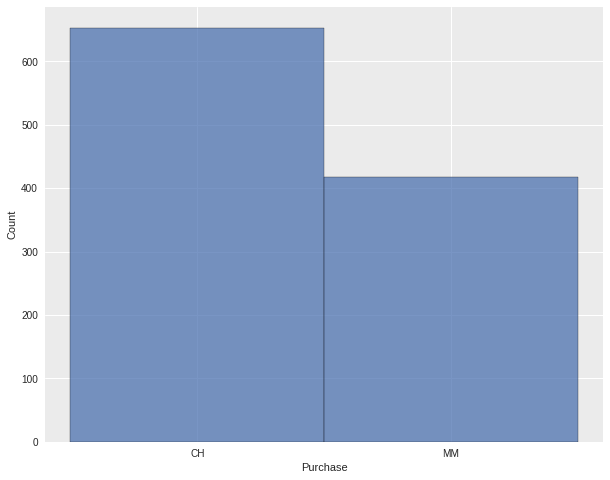

In [ ]:
sns.histplot(oj['Purchase']);

In [ ]:
stats = oj['Purchase'].value_counts()
stats = pd.DataFrame(stats)
stats['%-age'] = stats['Purchase']/sum(stats['Purchase'])
stats.loc['Total'] = stats.sum(axis=0)
stats

Purchase    %-age
CH        653.0  0.61028
MM        417.0  0.38972
Total    1070.0  1.00000

In [ ]:
stats.sum(axis=0)

Purchase    2140.0
%-age          2.0
dtype: float64

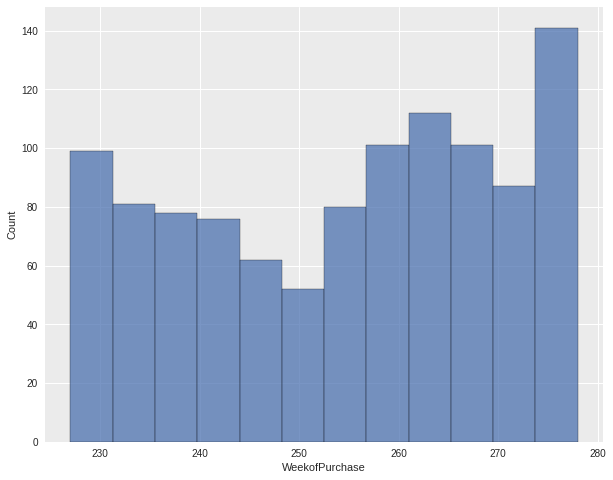

In [ ]:
sns.histplot(oj['WeekofPurchase']);

We bin `WeekofPurchase` into `Early`, `Mid` and `Late` purchases as this weill give us better understanding instead of taking on just particular timelines.

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated) function.

We are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

In [ ]:
bins = np.linspace(min(oj['WeekofPurchase']), max(oj['WeekofPurchase']), 4)
bins

array([227., 244., 261., 278.])

We set group names:

In [ ]:
group_names = ['Early_WoP', 'Mid_WoP', 'Late_WoP']

We apply the function "`cut`" to determine what each value of `oj['WeekofPurchase']` belongs to.

In [ ]:
oj['WeekofPurchase-binned'] = pd.cut(oj['WeekofPurchase'], bins, labels=group_names, include_lowest=True )
oj[['WeekofPurchase','WeekofPurchase-binned']].head(20)

WeekofPurchase WeekofPurchase-binned
0              237             Early_WoP
1              239             Early_WoP
2              245               Mid_WoP
3              227             Early_WoP
4              228             Early_WoP
5              230             Early_WoP
6              232             Early_WoP
7              234             Early_WoP
8              235             Early_WoP
9              238             Early_WoP
10             240             Early_WoP
11             263              Late_WoP
12             276              Late_WoP
13             268              Late_WoP
14             278              Late_WoP
15             278              Late_WoP
16             240             Early_WoP
17             268              Late_WoP
18             269              Late_WoP
19             254               Mid_WoP

In [ ]:
oj['WeekofPurchase-binned'].value_counts()

Late_WoP     423
Early_WoP    349
Mid_WoP      298
Name: WeekofPurchase-binned, dtype: int64

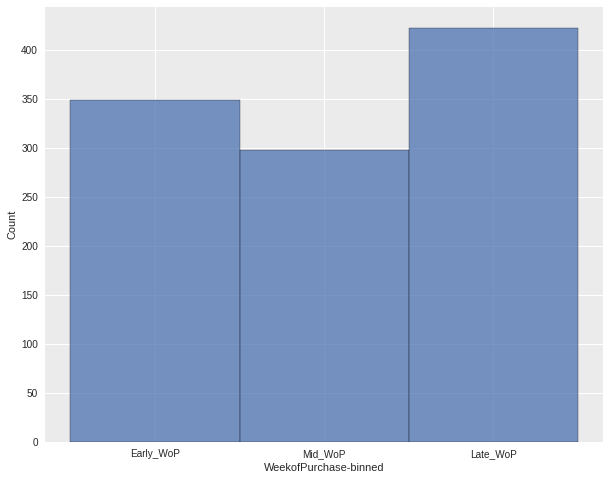

In [ ]:
sns.histplot(oj['WeekofPurchase-binned'])

From the above, we now have more balance in our dataset.

Get the indicator variables and assign it to data frame "`dummy_variable_1`":

In [ ]:
dummy_variable_1 = pd.get_dummies(oj['StoreID'])
dummy_variable_1.head()

1  2  3  4  7
0  1  0  0  0  0
1  1  0  0  0  0
2  1  0  0  0  0
3  1  0  0  0  0
4  0  0  0  0  1

Change the column names for clarity:

In [ ]:
dummy_variable_1.rename(columns={1:'StoreID_1', 2:'StoreID_2', 3: 'StoreID_3', 4 : 'StoreID_4', 7 : 'StoreID_7'}, inplace=True)
dummy_variable_1.head()

StoreID_1  StoreID_2  StoreID_3  StoreID_4  StoreID_7
0          1          0          0          0          0
1          1          0          0          0          0
2          1          0          0          0          0
3          1          0          0          0          0
4          0          0          0          0          1

In [ ]:
# merge data frame "oj" and "dummy_variable_1" 
oj = pd.concat([oj, dummy_variable_1], axis=1)

# oj2 = pd.concat([oj2, dummy_variable_1], axis=1)

# drop original column "StoreID" from "oj"
oj.drop("StoreID", axis = 1, inplace=True)

# oj2.drop("StoreID", axis = 1, inplace=True)

In [ ]:
oj.head()

Purchase  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0       CH             237     1.75     1.99    0.00     0.0          0   
1       CH             239     1.75     1.99    0.00     0.3          0   
2       CH             245     1.86     2.09    0.17     0.0          0   
3       MM             227     1.69     1.69    0.00     0.0          0   
4       CH             228     1.69     1.69    0.00     0.0          0   

   SpecialMM   LoyalCH  SalePriceMM  ...  PctDiscMM  PctDiscCH ListPriceDiff  \
0          0  0.500000         1.99  ...   0.000000   0.000000          0.24   
1          1  0.600000         1.69  ...   0.150754   0.000000          0.24   
2          0  0.680000         2.09  ...   0.000000   0.091398          0.23   
3          0  0.400000         1.69  ...   0.000000   0.000000          0.00   
4          0  0.956535         1.69  ...   0.000000   0.000000          0.00   

   STORE  WeekofPurchase-binned  StoreID_1  StoreID_2 StoreID_3  StoreID_4  \
0      1              Early_WoP          1          0         0          0   
1      1              Early_WoP          1          0         0          0   
2      1                Mid_WoP          1          0         0          0   
3      1              Early_WoP          1          0         0          0   
4      0              Early_WoP          0          0         0          0   

   StoreID_7  
0          0  
1          0  
2          0  
3          0  
4          1  

[5 rows x 23 columns]

In [ ]:
# oj2.head()

In [ ]:
oj['purchase'] = oj['Purchase'].apply(lambda x: 1 if x  == 'CH' else 0)
# oj2['purchase'] = oj2['Purchase'].apply(lambda x: 1 if x  == 'CH' else 0)

In [ ]:
oj.head()

Purchase  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0       CH             237     1.75     1.99    0.00     0.0          0   
1       CH             239     1.75     1.99    0.00     0.3          0   
2       CH             245     1.86     2.09    0.17     0.0          0   
3       MM             227     1.69     1.69    0.00     0.0          0   
4       CH             228     1.69     1.69    0.00     0.0          0   

   SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  PctDiscMM  \
0          0  0.500000         1.99         1.75       0.24     No   0.000000   
1          1  0.600000         1.69         1.75      -0.06     No   0.150754   
2          0  0.680000         2.09         1.69       0.40     No   0.000000   
3          0  0.400000         1.69         1.69       0.00     No   0.000000   
4          0  0.956535         1.69         1.69       0.00    Yes   0.000000   

   PctDiscCH  ListPriceDiff  STORE WeekofPurchase-binned  StoreID_1  \
0   0.000000           0.24      1             Early_WoP          1   
1   0.000000           0.24      1             Early_WoP          1   
2   0.091398           0.23      1               Mid_WoP          1   
3   0.000000           0.00      1             Early_WoP          1   
4   0.000000           0.00      0             Early_WoP          0   

   StoreID_2  StoreID_3  StoreID_4  StoreID_7  
0          0          0          0          0  
1          0          0          0          0  
2          0          0          0          0  
3          0          0          0          0  
4          0          0          0          1

In [ ]:
# iris_df['target'] = iris_df['target'].map({0: iris['target_names'][0],
#                                           1: iris['target_names'][1],
#                                           2: iris['target_names'][2]})

In [ ]:
# oj['purchase'] = oj['purchase'].map({0: oj['purchase'][0], oj['purchase'][1]})

In [ ]:
oj[['StoreID_7','Store7']]

StoreID_7 Store7
0             0     No
1             0     No
2             0     No
3             0     No
4             1    Yes
...         ...    ...
1065          1    Yes
1066          1    Yes
1067          1    Yes
1068          1    Yes
1069          0     No

[1070 rows x 2 columns]

In [ ]:
oj['Store7_remap'] = oj['Store7'].apply(lambda x: 1 if x  == 'Yes' else 0)
oj[['StoreID_7','Store7','Store7_remap']]

StoreID_7 Store7  Store7_remap
0             0     No             0
1             0     No             0
2             0     No             0
3             0     No             0
4             1    Yes             1
...         ...    ...           ...
1065          1    Yes             1
1066          1    Yes             1
1067          1    Yes             1
1068          1    Yes             1
1069          0     No             0

[1070 rows x 3 columns]

In [ ]:
oj['Store7_remap'] == oj['StoreID_7']

0       True
1       True
2       True
3       True
4       True
        ... 
1065    True
1066    True
1067    True
1068    True
1069    True
Length: 1070, dtype: bool

In [ ]:
for i in oj['Store7_remap'] == oj['StoreID_7']:
    if i == False:
        print(i)

In [ ]:
oj.drop(["Store7_remap", 'Store7'], axis = 1, inplace=True)
# oj2.drop(['Purchase', 'Store7'], axis = 1, inplace=True)

In [ ]:
# oj2.head()

In [ ]:
dummy_variable_2 = pd.get_dummies(oj['WeekofPurchase-binned'])
dummy_variable_2.head()

Early_WoP  Mid_WoP  Late_WoP
0          1        0         0
1          1        0         0
2          0        1         0
3          1        0         0
4          1        0         0

In [ ]:
# merge data frame "oj" and "dummy_variable_2" 
oj = pd.concat([oj, dummy_variable_2], axis=1)
oj.head()

Purchase  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0       CH             237     1.75     1.99    0.00     0.0          0   
1       CH             239     1.75     1.99    0.00     0.3          0   
2       CH             245     1.86     2.09    0.17     0.0          0   
3       MM             227     1.69     1.69    0.00     0.0          0   
4       CH             228     1.69     1.69    0.00     0.0          0   

   SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  PctDiscMM  \
0          0  0.500000         1.99         1.75       0.24   0.000000   
1          1  0.600000         1.69         1.75      -0.06   0.150754   
2          0  0.680000         2.09         1.69       0.40   0.000000   
3          0  0.400000         1.69         1.69       0.00   0.000000   
4          0  0.956535         1.69         1.69       0.00   0.000000   

   PctDiscCH  ListPriceDiff  STORE WeekofPurchase-binned  StoreID_1  \
0   0.000000           0.24      1             Early_WoP          1   
1   0.000000           0.24      1             Early_WoP          1   
2   0.091398           0.23      1               Mid_WoP          1   
3   0.000000           0.00      1             Early_WoP          1   
4   0.000000           0.00      0             Early_WoP          0   

   StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  Mid_WoP  Late_WoP  
0          0          0          0          0          1        0         0  
1          0          0          0          0          1        0         0  
2          0          0          0          0          0        1         0  
3          0          0          0          0          1        0         0  
4          0          0          0          1          1        0         0

In [ ]:
oj.rename(columns = {'Purchase': 'purchase'}, inplace = True)

In [ ]:
oj.drop(['WeekofPurchase-binned'], axis = 1, inplace=True)
oj.head()

purchase  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0       CH             237     1.75     1.99    0.00     0.0          0   
1       CH             239     1.75     1.99    0.00     0.3          0   
2       CH             245     1.86     2.09    0.17     0.0          0   
3       MM             227     1.69     1.69    0.00     0.0          0   
4       CH             228     1.69     1.69    0.00     0.0          0   

   SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  PctDiscMM  \
0          0  0.500000         1.99         1.75       0.24   0.000000   
1          1  0.600000         1.69         1.75      -0.06   0.150754   
2          0  0.680000         2.09         1.69       0.40   0.000000   
3          0  0.400000         1.69         1.69       0.00   0.000000   
4          0  0.956535         1.69         1.69       0.00   0.000000   

   PctDiscCH  ListPriceDiff  STORE  StoreID_1  StoreID_2  StoreID_3  \
0   0.000000           0.24      1          1          0          0   
1   0.000000           0.24      1          1          0          0   
2   0.091398           0.23      1          1          0          0   
3   0.000000           0.00      1          1          0          0   
4   0.000000           0.00      0          0          0          0   

   StoreID_4  StoreID_7  Early_WoP  Mid_WoP  Late_WoP  
0          0          0          1        0         0  
1          0          0          1        0         0  
2          0          0          0        1         0  
3          0          0          1        0         0  
4          0          1          1        0         0

In [ ]:
oj['STORE'].unique()

array([1, 0, 2, 3, 4])

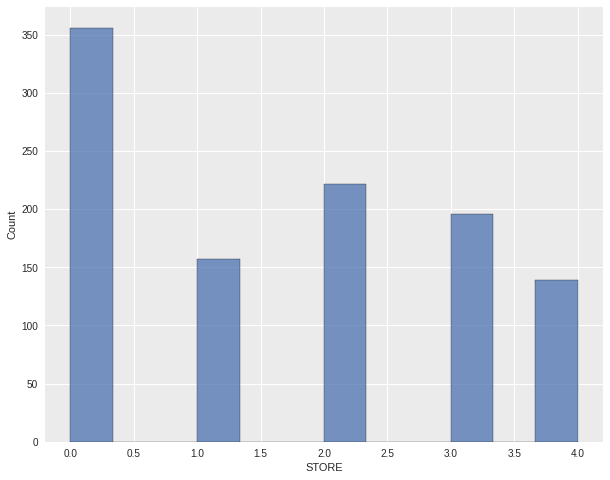

In [ ]:
sns.histplot(oj['STORE'])

In [ ]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   PriceCH         1070 non-null   float64
 3   PriceMM         1070 non-null   float64
 4   DiscCH          1070 non-null   float64
 5   DiscMM          1070 non-null   float64
 6   SpecialCH       1070 non-null   int64  
 7   SpecialMM       1070 non-null   int64  
 8   LoyalCH         1070 non-null   float64
 9   SalePriceMM     1070 non-null   float64
 10  SalePriceCH     1070 non-null   float64
 11  PriceDiff       1070 non-null   float64
 12  PctDiscMM       1070 non-null   float64
 13  PctDiscCH       1070 non-null   float64
 14  ListPriceDiff   1070 non-null   float64
 15  STORE           1070 non-null   int64  
 16  StoreID_1       1070 non-null   uint8  
 17  StoreID_2       1070 non-null   u

In [ ]:
oj.describe()

WeekofPurchase      PriceCH      PriceMM       DiscCH       DiscMM  \
count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean       254.381308     1.867421     2.085411     0.051860     0.123364   
std         15.558286     0.101970     0.134386     0.117474     0.213834   
min        227.000000     1.690000     1.690000     0.000000     0.000000   
25%        240.000000     1.790000     1.990000     0.000000     0.000000   
50%        257.000000     1.860000     2.090000     0.000000     0.000000   
75%        268.000000     1.990000     2.180000     0.000000     0.230000   
max        278.000000     2.090000     2.290000     0.500000     0.800000   

         SpecialCH    SpecialMM      LoyalCH  SalePriceMM  SalePriceCH  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.147664     0.161682     0.565782     1.962047     1.815561   
std       0.354932     0.368331     0.307843     0.252697     0.143384   
min       0.000000     0.000000     0.000011     1.190000     1.390000   
25%       0.000000     0.000000     0.325257     1.690000     1.750000   
50%       0.000000     0.000000     0.600000     2.090000     1.860000   
75%       0.000000     0.000000     0.850873     2.130000     1.890000   
max       1.000000     1.000000     0.999947     2.290000     2.090000   

         PriceDiff    PctDiscMM    PctDiscCH  ListPriceDiff        STORE  \
count  1070.000000  1070.000000  1070.000000    1070.000000  1070.000000   
mean      0.146486     0.059298     0.027314       0.217991     1.630841   
std       0.271563     0.101760     0.062232       0.107535     1.430387   
min      -0.670000     0.000000     0.000000       0.000000     0.000000   
25%       0.000000     0.000000     0.000000       0.140000     0.000000   
50%       0.230000     0.000000     0.000000       0.240000     2.000000   
75%       0.320000     0.112676     0.000000       0.300000     3.000000   
max       0.640000     0.402010     0.252688       0.440000     4.000000   

         StoreID_1    StoreID_2    StoreID_3    StoreID_4    StoreID_7  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.146729     0.207477     0.183178     0.129907     0.332710   
std       0.354001     0.405689     0.386993     0.336358     0.471404   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Early_WoP      Mid_WoP     Late_WoP  
count  1070.000000  1070.000000  1070.000000  
mean      0.326168     0.278505     0.395327  
std       0.469029     0.448473     0.489149  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

In [ ]:
# colors = ['black', 'yellow']
# sns.pairplot(oj, hue='purchase', palette=sns.xkcd_palette(colors))

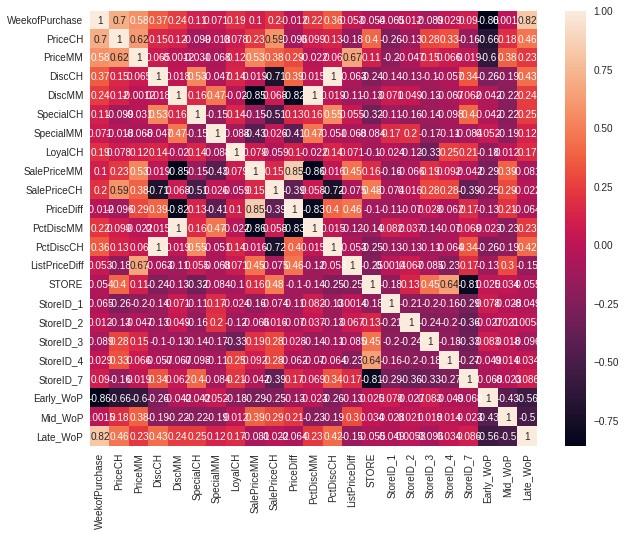

In [ ]:
corr = oj.corr()
sns.heatmap(corr, annot=True)
# sns.set(rc={'figure.figsize':(25,35)})

From the above, we see that the pairs `DiscCH` and `PctDiscCH` and `PctDiscMM` and `DiscMM` are perfectly correlated. As a result, we can remove one of the pairs.

In [ ]:
oj.columns

Index(['purchase', 'WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE',
       'StoreID_1', 'StoreID_2', 'StoreID_3', 'StoreID_4', 'StoreID_7',
       'Early_WoP', 'Mid_WoP', 'Late_WoP'],
      dtype='object')

In [ ]:
oj[['DiscCH', 'PctDiscCH', 'PctDiscMM', 'DiscMM']]

DiscCH  PctDiscCH  PctDiscMM  DiscMM
0       0.00   0.000000   0.000000    0.00
1       0.00   0.000000   0.150754    0.30
2       0.17   0.091398   0.000000    0.00
3       0.00   0.000000   0.000000    0.00
4       0.00   0.000000   0.000000    0.00
...      ...        ...        ...     ...
1065    0.10   0.053763   0.000000    0.00
1066    0.00   0.000000   0.000000    0.00
1067    0.00   0.000000   0.000000    0.00
1068    0.00   0.000000   0.112676    0.24
1069    0.00   0.000000   0.000000    0.00

[1070 rows x 4 columns]

In [ ]:
oj.drop(["PctDiscCH", 'PctDiscMM'], axis = 1, inplace=True)
# oj2.drop(["PctDiscCH", 'PctDiscMM'], axis = 1, inplace=True)
# oj3.drop(["PctDiscCH", 'PctDiscMM'], axis = 1, inplace=True)
oj.head()

purchase  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0       CH             237     1.75     1.99    0.00     0.0          0   
1       CH             239     1.75     1.99    0.00     0.3          0   
2       CH             245     1.86     2.09    0.17     0.0          0   
3       MM             227     1.69     1.69    0.00     0.0          0   
4       CH             228     1.69     1.69    0.00     0.0          0   

   SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  \
0          0  0.500000         1.99         1.75       0.24           0.24   
1          1  0.600000         1.69         1.75      -0.06           0.24   
2          0  0.680000         2.09         1.69       0.40           0.23   
3          0  0.400000         1.69         1.69       0.00           0.00   
4          0  0.956535         1.69         1.69       0.00           0.00   

   STORE  StoreID_1  StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  \
0      1          1          0          0          0          0          1   
1      1          1          0          0          0          0          1   
2      1          1          0          0          0          0          0   
3      1          1          0          0          0          0          1   
4      0          0          0          0          0          1          1   

   Mid_WoP  Late_WoP  
0        0         0  
1        0         0  
2        1         0  
3        0         0  
4        0         0

In [ ]:
oj['purchase'].value_counts()

CH    653
MM    417
Name: purchase, dtype: int64

In [ ]:
oj.columns, oj.columns.shape

(Index(['purchase', 'WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
        'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
        'PriceDiff', 'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2',
        'StoreID_3', 'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP',
        'Late_WoP'],
       dtype='object'), (22,))

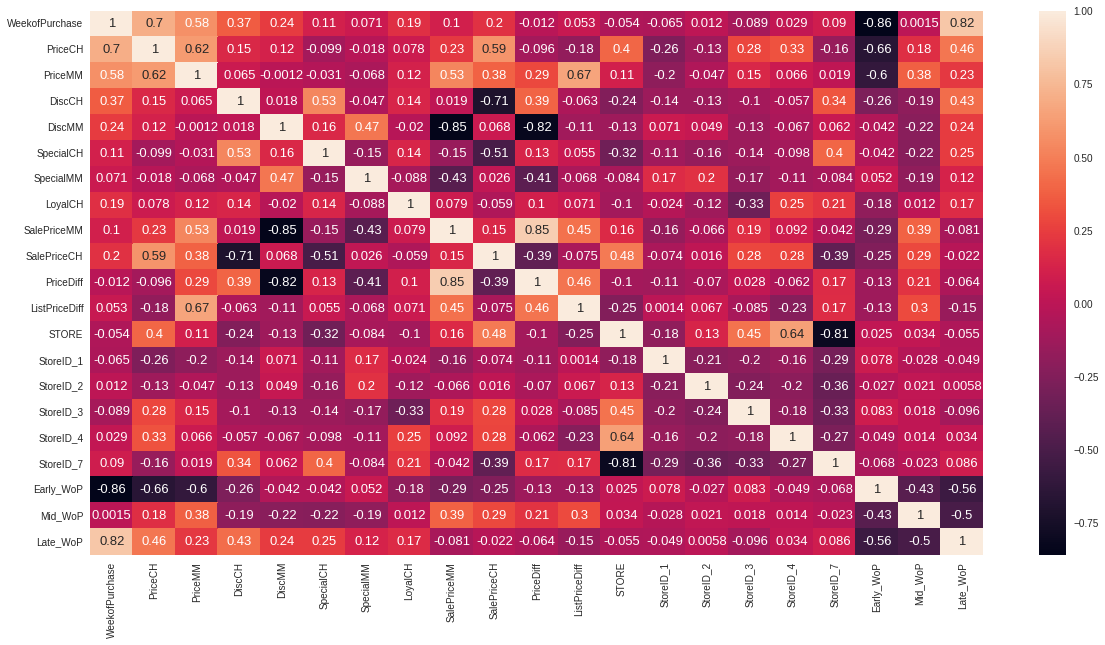

In [ ]:
corr = oj.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={"fontsize":13})
# sns.set(rc={'figure.figsize':(25,35)})

In [ ]:
oj[['purchase','StoreID_7']].groupby(['StoreID_7']).count()

purchase
StoreID_7          
0               714
1               356

In [ ]:
oj

purchase  WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  \
0          CH             237     1.75     1.99    0.00    0.00          0   
1          CH             239     1.75     1.99    0.00    0.30          0   
2          CH             245     1.86     2.09    0.17    0.00          0   
3          MM             227     1.69     1.69    0.00    0.00          0   
4          CH             228     1.69     1.69    0.00    0.00          0   
...       ...             ...      ...      ...     ...     ...        ...   
1065       CH             252     1.86     2.09    0.10    0.00          0   
1066       CH             256     1.86     2.18    0.00    0.00          0   
1067       MM             257     1.86     2.18    0.00    0.00          0   
1068       CH             261     1.86     2.13    0.00    0.24          0   
1069       CH             270     1.86     2.18    0.00    0.00          0   

      SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  \
0             0  0.500000         1.99         1.75       0.24           0.24   
1             1  0.600000         1.69         1.75      -0.06           0.24   
2             0  0.680000         2.09         1.69       0.40           0.23   
3             0  0.400000         1.69         1.69       0.00           0.00   
4             0  0.956535         1.69         1.69       0.00           0.00   
...         ...       ...          ...          ...        ...            ...   
1065          0  0.587822         2.09         1.76       0.33           0.23   
1066          0  0.670258         2.18         1.86       0.32           0.32   
1067          0  0.736206         2.18         1.86       0.32           0.32   
1068          0  0.588965         1.89         1.86       0.03           0.27   
1069          0  0.671172         2.18         1.86       0.32           0.32   

      STORE  StoreID_1  StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  \
0         1          1          0          0          0          0          1   
1         1          1          0          0          0          0          1   
2         1          1          0          0          0          0          0   
3         1          1          0          0          0          0          1   
4         0          0          0          0          0          1          1   
...     ...        ...        ...        ...        ...        ...        ...   
1065      0          0          0          0          0          1          0   
1066      0          0          0          0          0          1          0   
1067      0          0          0          0          0          1          0   
1068      0          0          0          0          0          1          0   
1069      1          1          0          0          0          0          0   

      Mid_WoP  Late_WoP  
0           0         0  
1           0         0  
2           1         0  
3           0         0  
4           0         0  
...       ...       ...  
1065        1         0  
1066        1         0  
1067        1         0  
1068        1         0  
1069        0         1  

[1070 rows x 22 columns]

In [ ]:
X = oj.copy()
y = oj['purchase']

In [ ]:
X = X.drop('purchase', axis = 1)
X

WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  SpecialMM  \
0                237     1.75     1.99    0.00    0.00          0          0   
1                239     1.75     1.99    0.00    0.30          0          1   
2                245     1.86     2.09    0.17    0.00          0          0   
3                227     1.69     1.69    0.00    0.00          0          0   
4                228     1.69     1.69    0.00    0.00          0          0   
...              ...      ...      ...     ...     ...        ...        ...   
1065             252     1.86     2.09    0.10    0.00          0          0   
1066             256     1.86     2.18    0.00    0.00          0          0   
1067             257     1.86     2.18    0.00    0.00          0          0   
1068             261     1.86     2.13    0.00    0.24          0          0   
1069             270     1.86     2.18    0.00    0.00          0          0   

       LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  STORE  \
0     0.500000         1.99         1.75       0.24           0.24      1   
1     0.600000         1.69         1.75      -0.06           0.24      1   
2     0.680000         2.09         1.69       0.40           0.23      1   
3     0.400000         1.69         1.69       0.00           0.00      1   
4     0.956535         1.69         1.69       0.00           0.00      0   
...        ...          ...          ...        ...            ...    ...   
1065  0.587822         2.09         1.76       0.33           0.23      0   
1066  0.670258         2.18         1.86       0.32           0.32      0   
1067  0.736206         2.18         1.86       0.32           0.32      0   
1068  0.588965         1.89         1.86       0.03           0.27      0   
1069  0.671172         2.18         1.86       0.32           0.32      1   

      StoreID_1  StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  \
0             1          0          0          0          0          1   
1             1          0          0          0          0          1   
2             1          0          0          0          0          0   
3             1          0          0          0          0          1   
4             0          0          0          0          1          1   
...         ...        ...        ...        ...        ...        ...   
1065          0          0          0          0          1          0   
1066          0          0          0          0          1          0   
1067          0          0          0          0          1          0   
1068          0          0          0          0          1          0   
1069          1          0          0          0          0          0   

      Mid_WoP  Late_WoP  
0           0         0  
1           0         0  
2           1         0  
3           0         0  
4           0         0  
...       ...       ...  
1065        1         0  
1066        1         0  
1067        1         0  
1068        1         0  
1069        0         1  

[1070 rows x 21 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WeekofPurchase  1070 non-null   int64  
 1   PriceCH         1070 non-null   float64
 2   PriceMM         1070 non-null   float64
 3   DiscCH          1070 non-null   float64
 4   DiscMM          1070 non-null   float64
 5   SpecialCH       1070 non-null   int64  
 6   SpecialMM       1070 non-null   int64  
 7   LoyalCH         1070 non-null   float64
 8   SalePriceMM     1070 non-null   float64
 9   SalePriceCH     1070 non-null   float64
 10  PriceDiff       1070 non-null   float64
 11  ListPriceDiff   1070 non-null   float64
 12  STORE           1070 non-null   int64  
 13  StoreID_1       1070 non-null   uint8  
 14  StoreID_2       1070 non-null   uint8  
 15  StoreID_3       1070 non-null   uint8  
 16  StoreID_4       1070 non-null   uint8  
 17  StoreID_7       1070 non-null   u

Splitting into training and testing set

In [ ]:
X.columns, X.shape

(Index(['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH',
        'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype='object'), (1070, 21))

In [ ]:
y

0       CH
1       CH
2       CH
3       MM
4       CH
        ..
1065    CH
1066    CH
1067    MM
1068    CH
1069    CH
Name: purchase, Length: 1070, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.252, random_state=0)

In [ ]:
X_train

WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  SpecialMM  \
743              271     1.99     2.09    0.10     0.4          1          0   
150              252     1.86     2.09    0.10     0.0          0          0   
977              276     1.99     2.13    0.00     0.0          0          1   
899              265     1.86     2.13    0.37     0.0          1          0   
397              258     1.86     2.18    0.00     0.0          0          0   
...              ...      ...      ...     ...     ...        ...        ...   
1033             272     1.99     2.09    0.00     0.4          0          0   
763              253     1.89     2.09    0.13     0.0          0          0   
835              231     1.79     1.79    0.00     0.0          0          0   
559              270     1.86     2.13    0.27     0.0          1          0   
684              256     1.86     2.18    0.00     0.0          0          0   

       LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  STORE  \
743   0.691063         1.69         1.89      -0.20           0.10      3   
150   0.163840         2.09         1.76       0.33           0.23      0   
977   0.129007         2.13         1.99       0.14           0.14      1   
899   0.932891         2.13         1.49       0.64           0.27      0   
397   0.358548         2.18         1.86       0.32           0.32      0   
...        ...          ...          ...        ...            ...    ...   
1033  0.951731         1.69         1.99      -0.30           0.10      4   
763   0.680000         2.09         1.76       0.33           0.20      2   
835   0.600000         1.79         1.79       0.00           0.00      4   
559   0.600000         2.13         1.59       0.54           0.27      0   
684   0.131072         2.18         1.86       0.32           0.32      0   

      StoreID_1  StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  \
743           0          0          1          0          0          0   
150           0          0          0          0          1          0   
977           1          0          0          0          0          0   
899           0          0          0          0          1          0   
397           0          0          0          0          1          0   
...         ...        ...        ...        ...        ...        ...   
1033          0          0          0          1          0          0   
763           0          1          0          0          0          0   
835           0          0          0          1          0          1   
559           0          0          0          0          1          0   
684           0          0          0          0          1          0   

      Mid_WoP  Late_WoP  
743         0         1  
150         1         0  
977         0         1  
899         0         1  
397         1         0  
...       ...       ...  
1033        0         1  
763         1         0  
835         0         0  
559         0         1  
684         1         0  

[800 rows x 21 columns]

In [ ]:
X_test

WeekofPurchase  PriceCH  PriceMM  DiscCH  DiscMM  SpecialCH  SpecialMM  \
928             234     1.79     2.09    0.00    0.00          0          0   
780             232     1.69     1.99    0.00    0.00          1          0   
564             266     1.86     2.13    0.37    0.00          1          0   
520             259     1.86     2.18    0.00    0.40          0          1   
399             271     1.86     2.13    0.00    0.00          0          0   
..              ...      ...      ...     ...     ...        ...        ...   
270             273     1.86     2.18    0.00    0.06          0          0   
811             266     1.86     2.13    0.37    0.00          1          0   
154             231     1.79     1.79    0.00    0.00          0          0   
261             270     1.86     2.18    0.00    0.00          0          0   
521             275     1.96     2.18    0.00    0.80          0          1   

      LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  STORE  \
928  0.204800         2.09         1.79       0.30           0.30      3   
780  0.586313         1.99         1.69       0.30           0.30      1   
564  0.600000         2.13         1.49       0.64           0.27      0   
520  0.680000         1.78         1.86      -0.08           0.32      2   
399  0.429471         2.13         1.86       0.27           0.27      0   
..        ...          ...          ...        ...            ...    ...   
270  0.427008         2.12         1.86       0.26           0.32      2   
811  0.916114         2.13         1.49       0.64           0.27      0   
154  0.895142         1.79         1.79       0.00           0.00      3   
261  0.307200         2.18         1.86       0.32           0.32      2   
521  0.744000         1.38         1.96      -0.58           0.22      2   

     StoreID_1  StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  \
928          0          0          1          0          0          1   
780          1          0          0          0          0          1   
564          0          0          0          0          1          0   
520          0          1          0          0          0          0   
399          0          0          0          0          1          0   
..         ...        ...        ...        ...        ...        ...   
270          0          1          0          0          0          0   
811          0          0          0          0          1          0   
154          0          0          1          0          0          1   
261          0          1          0          0          0          0   
521          0          1          0          0          0          0   

     Mid_WoP  Late_WoP  
928        0         0  
780        0         0  
564        0         1  
520        1         0  
399        0         1  
..       ...       ...  
270        0         1  
811        0         1  
154        0         0  
261        0         1  
521        0         1  

[270 rows x 21 columns]

In [ ]:
y_train.value_counts(), y_test.value_counts()

(CH    500
 MM    300
 Name: purchase, dtype: int64, CH    153
 MM    117
 Name: purchase, dtype: int64)

In [ ]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()
X_train3 = X_train.copy()

X_test1 = X_test.copy()
X_test2 = X_test.copy()
X_test3 = X_test.copy()

In [ ]:
X_train1.drop('WeekofPurchase', axis = 1, inplace = True)
X_test1.drop('WeekofPurchase', axis = 1, inplace = True)

In [ ]:
X_train2.drop(['Early_WoP', 'Mid_WoP', 'Late_WoP'], axis = 1, inplace = True)
X_test2.drop(['Early_WoP', 'Mid_WoP', 'Late_WoP'], axis = 1, inplace = True)

In [ ]:
X_train1.columns,\
X_train2.columns,\
X_train3.columns

(Index(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
        'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'ListPriceDiff',
        'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3', 'StoreID_4',
        'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype='object'),
 Index(['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH',
        'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7'],
       dtype='object'),
 Index(['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH',
        'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype='object'))

# Models

## Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report, mean_squared_error
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import PartialDependenceDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import BaggingClassifier

import numpy as np

import graphviz

from IPython.display import Image, display
import pydotplus

In [ ]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [ ]:
dt1.fit(X_train1, y_train)
dt2.fit(X_train2, y_train)
dt3.fit(X_train3, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = dt1.predict(X_test1)
y_pred2 = dt2.predict(X_test2)
y_pred3 = dt3.predict(X_test3)

In [ ]:
y_pred_tr = dt2.predict(X_train2)
accuracy_score(y_train, y_pred_tr)

0.99125

In [ ]:
confusion_matrix(y_test, y_pred1)

array([[120,  33],
       [ 29,  88]])

In [ ]:
confusion_matrix(y_test, y_pred2)

array([[118,  35],
       [ 32,  85]])

In [ ]:
confusion_matrix(y_test, y_pred3)

array([[117,  36],
       [ 34,  83]])

In [ ]:
accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)

(0.7703703703703704, 0.7518518518518519, 0.7407407407407407)

In [ ]:
# from sklearn.metrics import plot_roc_curve

# disp_ = plot_roc_curve(dt1, X_test1, y_test)
# plot_roc_curve(dt2, X_test2, y_test, ax = disp_.ax_);
# plot_roc_curve(dt3, X_test3, y_test,  ax = disp_.ax_);

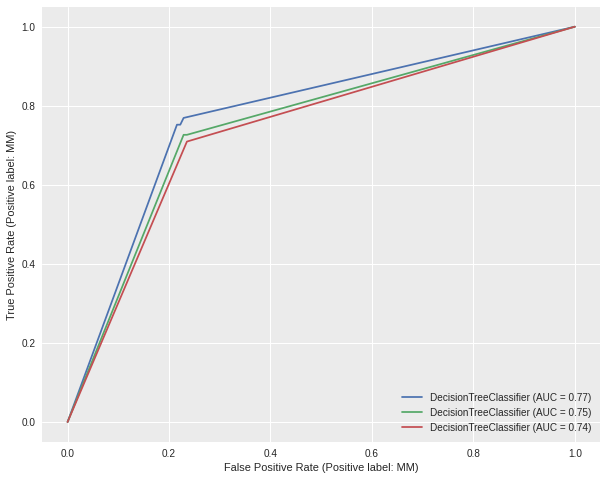

In [ ]:
disp = RocCurveDisplay.from_estimator(dt1, X_test1, y_test)
RocCurveDisplay.from_estimator(dt2, X_test2, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(dt3, X_test3, y_test,  ax = disp.ax_);

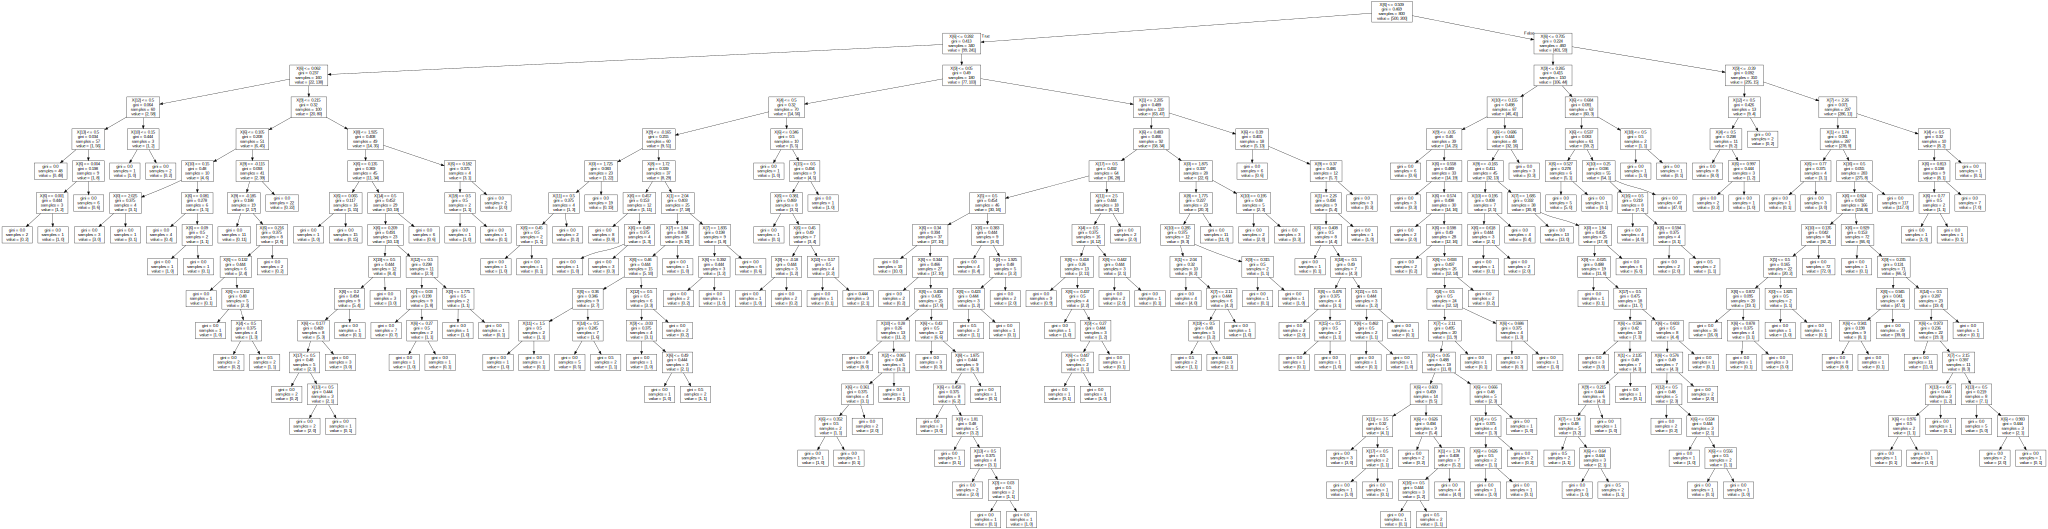

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(dt1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
cross_val_score(dt1, X_train1, y_train, cv=4)

# cross_val_score(dt2, X_train2, y_train, cv=4)

array([0.785, 0.77 , 0.78 , 0.72 ])

In [ ]:
dt1.get_n_leaves(), dt1.get_depth()

(181, 16)

In [ ]:
dt1.feature_importances_

array([0.02561761, 0.02256365, 0.00367317, 0.00489297, 0.02158808,
       0.00828808, 0.65784654, 0.01604444, 0.01162122, 0.11186044,
       0.03690329, 0.0112844 , 0.01622689, 0.00762514, 0.01222091,
       0.00558104, 0.0024829 , 0.0139064 , 0.00714286, 0.00262997])

In [ ]:
dt1.feature_names_in_

array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
       'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
       'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
       'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
      dtype=object)

Our data can get better if we are able to choose the appropriate depth for the decision tree.

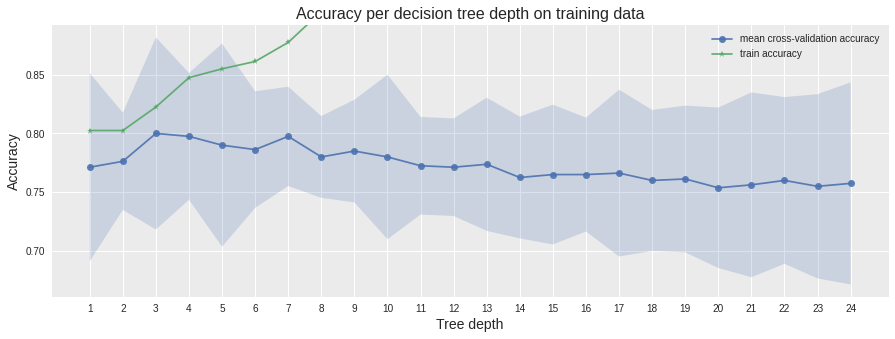

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth, criterion= 'entropy')
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train1, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-3 tree achieves the best mean cross-validation accuracy 80.0 +/- 4.08886% on training dataset


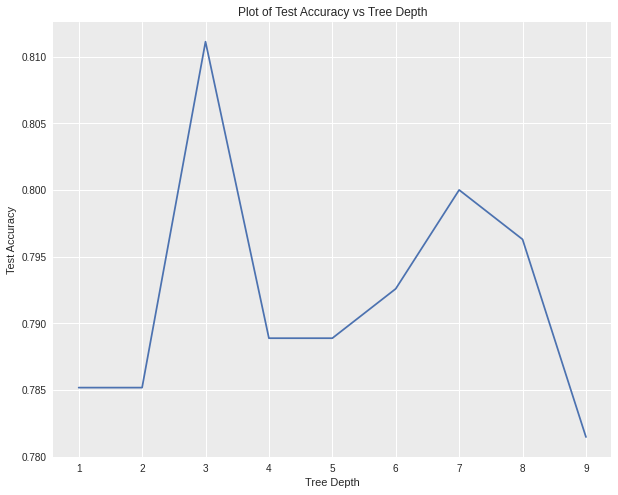

In [ ]:
test_acc = []

m = 10

depth = [i for i in range(1,m)]
for n in range(1,m):
    dt_trial = DecisionTreeClassifier(max_depth = n, criterion= 'entropy')
    dt_trial.fit(X_train1, y_train)
    y_pred_trial = dt_trial.predict(X_test1)
    test_acc.append(accuracy_score(y_test, y_pred_trial))


plt.plot(depth, test_acc)
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Plot of Test Accuracy vs Tree Depth');

In [ ]:
dt = DecisionTreeClassifier(max_depth= 3, criterion= 'entropy')
dt.fit(X_train1, y_train)
y_pred = dt.predict(X_test1)

In [ ]:
y_pred_tr = dt.predict(X_train1)
(1-accuracy_score(y_train, y_pred_tr))*100 #training error rate

17.75

In [ ]:
confusion_matrix(y_train, y_pred_tr)

array([[464,  36],
       [106, 194]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8111111111111111

In [ ]:
(1- accuracy_score(y_test, y_pred))*100 #test error rate

18.88888888888889

In [ ]:
confusion_matrix(y_test, y_pred)

array([[138,  15],
       [ 36,  81]])

In [ ]:
y_test_2 = y_test.apply(lambda x: 1 if x  == 'CH' else 0)
y_pred_dt_2 = np.where(y_pred == 'CH', 1, y_pred)
y_pred_dt_2 = np.where(y_pred_dt_2 == 'MM', 0, y_pred_dt_2)

In [ ]:
mean_squared_error(y_test_2, y_pred_dt_2)

0.18888888888888888

Text(0.5, 1.0, 'Confusion matrix')

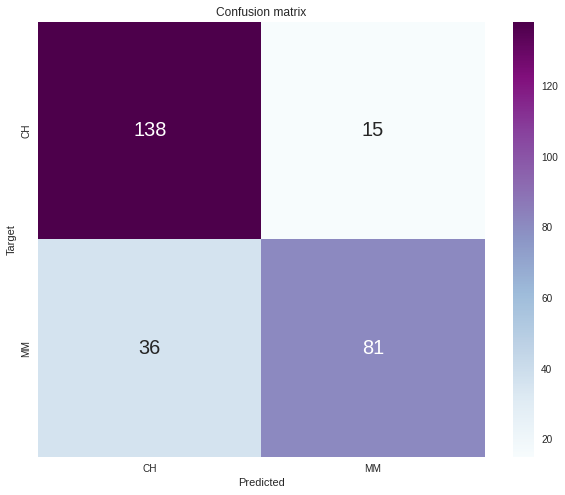

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['CH', 'MM'], 
            yticklabels=['CH', 'MM'], fmt='g',cmap='BuPu', annot_kws={"fontsize":20})
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

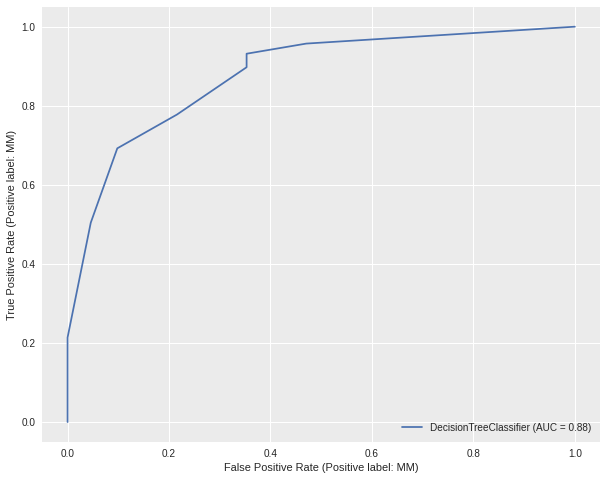

In [ ]:
RocCurveDisplay.from_estimator(dt, X_test1, y_test)

From the above, there is a 88% chance that the model will be able to distinguish between `CH` and `MM`.

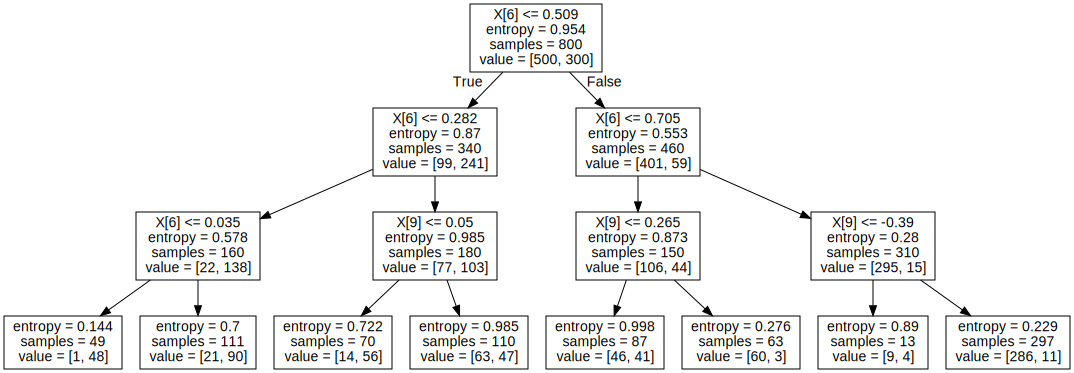

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
features = ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
       'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
       'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
       'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP']

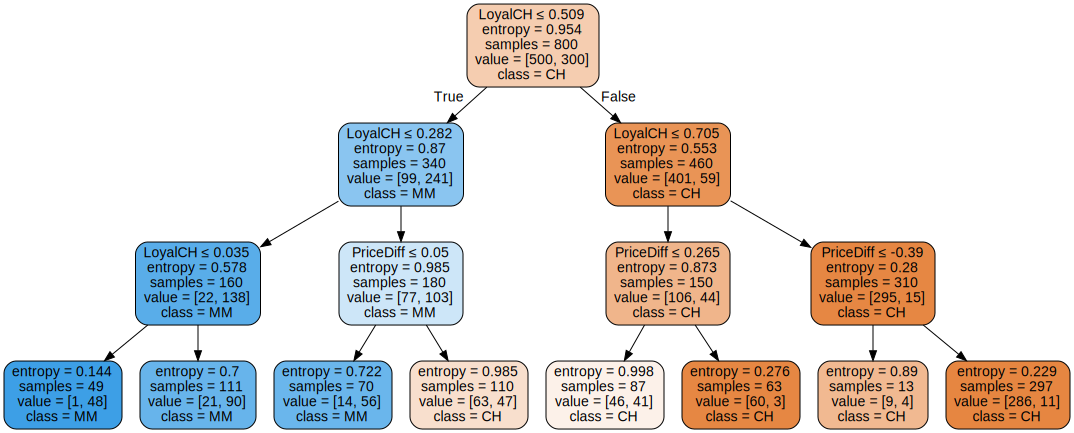

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=features,  
                                class_names= ['CH', 'MM'],  
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.format = 'png'
graph.render('dtree_render',view=True)
graph

In [ ]:
dt.get_n_leaves(), dt.get_depth()

(8, 3)

In [ ]:
dt.feature_importances_

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.8442591, 0.       , 0.       , 0.1557409, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       ])

From the tree above, we see that our model utilizes the `CH` and `MM` classes to perform the classification. 

From the `feature importance` we see that using a depth size of 3, only the `'LoyalCH'` and `'PriceDiff'`is used in the classification algorithm.

In the root (or zero) node, it identifies all the classes as `CH` alone. Furthermore, the algorithm checks if the `'LoyalCH'` value is less than or equal to 0.509, if `True` it identifies it as `MM` otherwise `CH`. The total sample at this point is 800, with 500 for `CH` and 300 for `MM`. At this node (0), we get an entropy score of 0.954.

The `'PriceDiff'` feature carries more importance in the second node.

The entropy tells us the level of impurity. It is a way to control the split of data decided by a decision tree. It influences how a decision tree forms its boundaries.


The equation of entropy shown below:

$$ \text{Entropy} = - ∑p(X)\log p(X) $$

where, $p(X)=$ fraction of examples in a given class.

For the first terminal node, we have a total sample of 49, and we arrive here if the `LoyalCH` $\leq 0.0035$. The class identified here is `MM`.

In [ ]:
    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Tree Depth: ', dt.max_depth)
    print('No. of leaves: ', dt.get_n_leaves())
    print('No. of features: ', dt.n_features_in_)
    print('--------------------------------------------------------')
    print("")

*************** Tree Summary ***************
Tree Depth:  3
No. of leaves:  8
No. of features:  20
--------------------------------------------------------



In [ ]:
dt.feature_names_in_

array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
       'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
       'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
       'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
      dtype=object)

In [ ]:
    print('*************** Evaluation on Training Data ***************')
    score_tr = dt.score(X_train1, y_train)
    pred_labels_tr = dt.predict(X_train1)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8225
              precision    recall  f1-score   support

          CH       0.81      0.93      0.87       500
          MM       0.84      0.65      0.73       300

    accuracy                           0.82       800
   macro avg       0.83      0.79      0.80       800
weighted avg       0.83      0.82      0.82       800

--------------------------------------------------------


In [ ]:
    print('*************** Evaluation on Test Data ***************')
    score_te = dt.score(X_test1, y_test)
    pred_labels_te = dt.predict(X_test1)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8111111111111111
              precision    recall  f1-score   support

          CH       0.79      0.90      0.84       153
          MM       0.84      0.69      0.76       117

    accuracy                           0.81       270
   macro avg       0.82      0.80      0.80       270
weighted avg       0.82      0.81      0.81       270

--------------------------------------------------------



From the two classification report above, we can see that we can generally improve our model by having more data with the variable `MM`

## Bagging Approach 

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. 

In [ ]:
bg = BaggingClassifier(random_state=0 , n_jobs=-1)

In [ ]:
params_bg = {'n_estimators' : np.arange(1, X_train1.columns.shape[0]+1) }

# Instantiate the grid search model
grid_search_bg = GridSearchCV(estimator = bg,
                           param_grid = params_bg,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search_bg.fit(X_train1, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
CPU times: user 570 ms, sys: 62.9 ms, total: 633 ms
Wall time: 10.8 s


GridSearchCV(cv=4, estimator=BaggingClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_bg.best_score_, grid_search_bg.best_estimator_

(0.7925000000000001,
 BaggingClassifier(n_estimators=19, n_jobs=-1, random_state=0))

In [ ]:
bg_best = grid_search_bg.best_estimator_

In [ ]:
y_pred_bg = bg_best.predict(X_test1)

In [ ]:
y_pred_bg_2 = np.where(y_pred_bg == 'CH', 1, y_pred)
y_pred_bg_2 = np.where(y_pred_bg_2 == 'MM', 0, y_pred_dt_2)

In [ ]:
mean_squared_error(y_test_2, y_pred_bg_2)

0.18888888888888888

In [ ]:
bg_best.n_features_in_, bg_best.feature_names_in_, bg_best.estimators_[18]

(20, array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
        'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype=object), DecisionTreeClassifier(random_state=1309320516))

In [ ]:
# Averages the importances from each of
# the ensemble trees.
feature_importances = np.mean([
    tree.feature_importances_ for tree in bg_best.estimators_
], axis=0)

In [ ]:
feature_importances, bg_best.feature_names_in_

(array([0.01567889, 0.0170723 , 0.0098568 , 0.00950926, 0.02103766,
        0.0118748 , 0.63316963, 0.02895245, 0.01951608, 0.08577659,
        0.05892403, 0.02142515, 0.01432911, 0.01152535, 0.00882958,
        0.005821  , 0.00423655, 0.0073441 , 0.0082115 , 0.00690918]),
 array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
        'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype=object))

In [ ]:
feat_impt_bg = pd.DataFrame( {'feat_impt_bg' : bg_best.feature_names_in_, 'value_bg' : feature_importances})
feat_impt_bg.sort_values(by = 'value_bg', inplace = True, ascending=False)

In [ ]:
feat_impt_bg[:5]

feat_impt_bg  value_bg
6         LoyalCH  0.633170
9       PriceDiff  0.085777
10  ListPriceDiff  0.058924
7     SalePriceMM  0.028952
11          STORE  0.021425

The top 5 important variables are given as above.

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [2, 4, 6, 8, 10, 15, 20, 25,30,50,100,200]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train1, y_train)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits
CPU times: user 9.78 s, sys: 450 ms, total: 10.2 s
Wall time: 3min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [2, 4, 6, 8, 10, 15, 20, 25, 30, 50,
                                          100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.82

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=0)

In [ ]:
rf_best.fit(X_train1, y_train)
y_pred_rf = rf_best.predict(X_test1)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.8111111111111111

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[133,  20],
       [ 31,  86]])

In [ ]:
y_test_2 = y_test.apply(lambda x: 1 if x  == 'CH' else 0)
y_pred_rf_2 = np.where(y_pred_rf == 'CH', 1, y_pred_rf)
y_pred_rf_2 = np.where(y_pred_rf_2 == 'MM', 0, y_pred_rf_2)

In [ ]:
mean_squared_error(y_test_2, y_pred_rf_2)

0.18888888888888888

We have the same MSE and $R^2$ as a result, both our Decision Tree and Random Forest are equivalent models.

In [ ]:
rf_best.score(y_pred_rf,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
rf_best.feature_importances_, rf_best.feature_names_in_

(array([0.04677801, 0.02716052, 0.00739411, 0.01694433, 0.00268261,
        0.01107868, 0.53599658, 0.05998686, 0.02264015, 0.04626338,
        0.04757013, 0.0423458 , 0.00692311, 0.00266842, 0.01651073,
        0.00824583, 0.0734449 , 0.01005431, 0.00253074, 0.01278081]),
 array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
        'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype=object))

In [ ]:
feat_impt_rf = pd.DataFrame( {'feat_impt' :rf_best.feature_names_in_, 'value':rf_best.feature_importances_})
feat_impt_rf.sort_values(by = 'value', inplace = True, ascending=False)

In [ ]:
feat_impt_rf

feat_impt     value
6         LoyalCH  0.535997
16      StoreID_7  0.073445
7     SalePriceMM  0.059987
10  ListPriceDiff  0.047570
0         PriceCH  0.046778
9       PriceDiff  0.046263
11          STORE  0.042346
1         PriceMM  0.027161
8     SalePriceCH  0.022640
3          DiscMM  0.016944
14      StoreID_3  0.016511
19       Late_WoP  0.012781
5       SpecialMM  0.011079
17      Early_WoP  0.010054
15      StoreID_4  0.008246
2          DiscCH  0.007394
12      StoreID_1  0.006923
4       SpecialCH  0.002683
13      StoreID_2  0.002668
18        Mid_WoP  0.002531

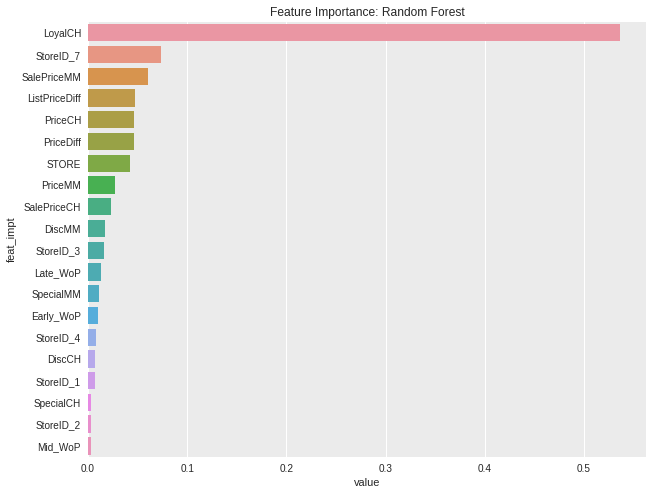

In [ ]:
sns.barplot(y = 'feat_impt', x = 'value', data = feat_impt_rf).set(title = 'Feature Importance: Random Forest');

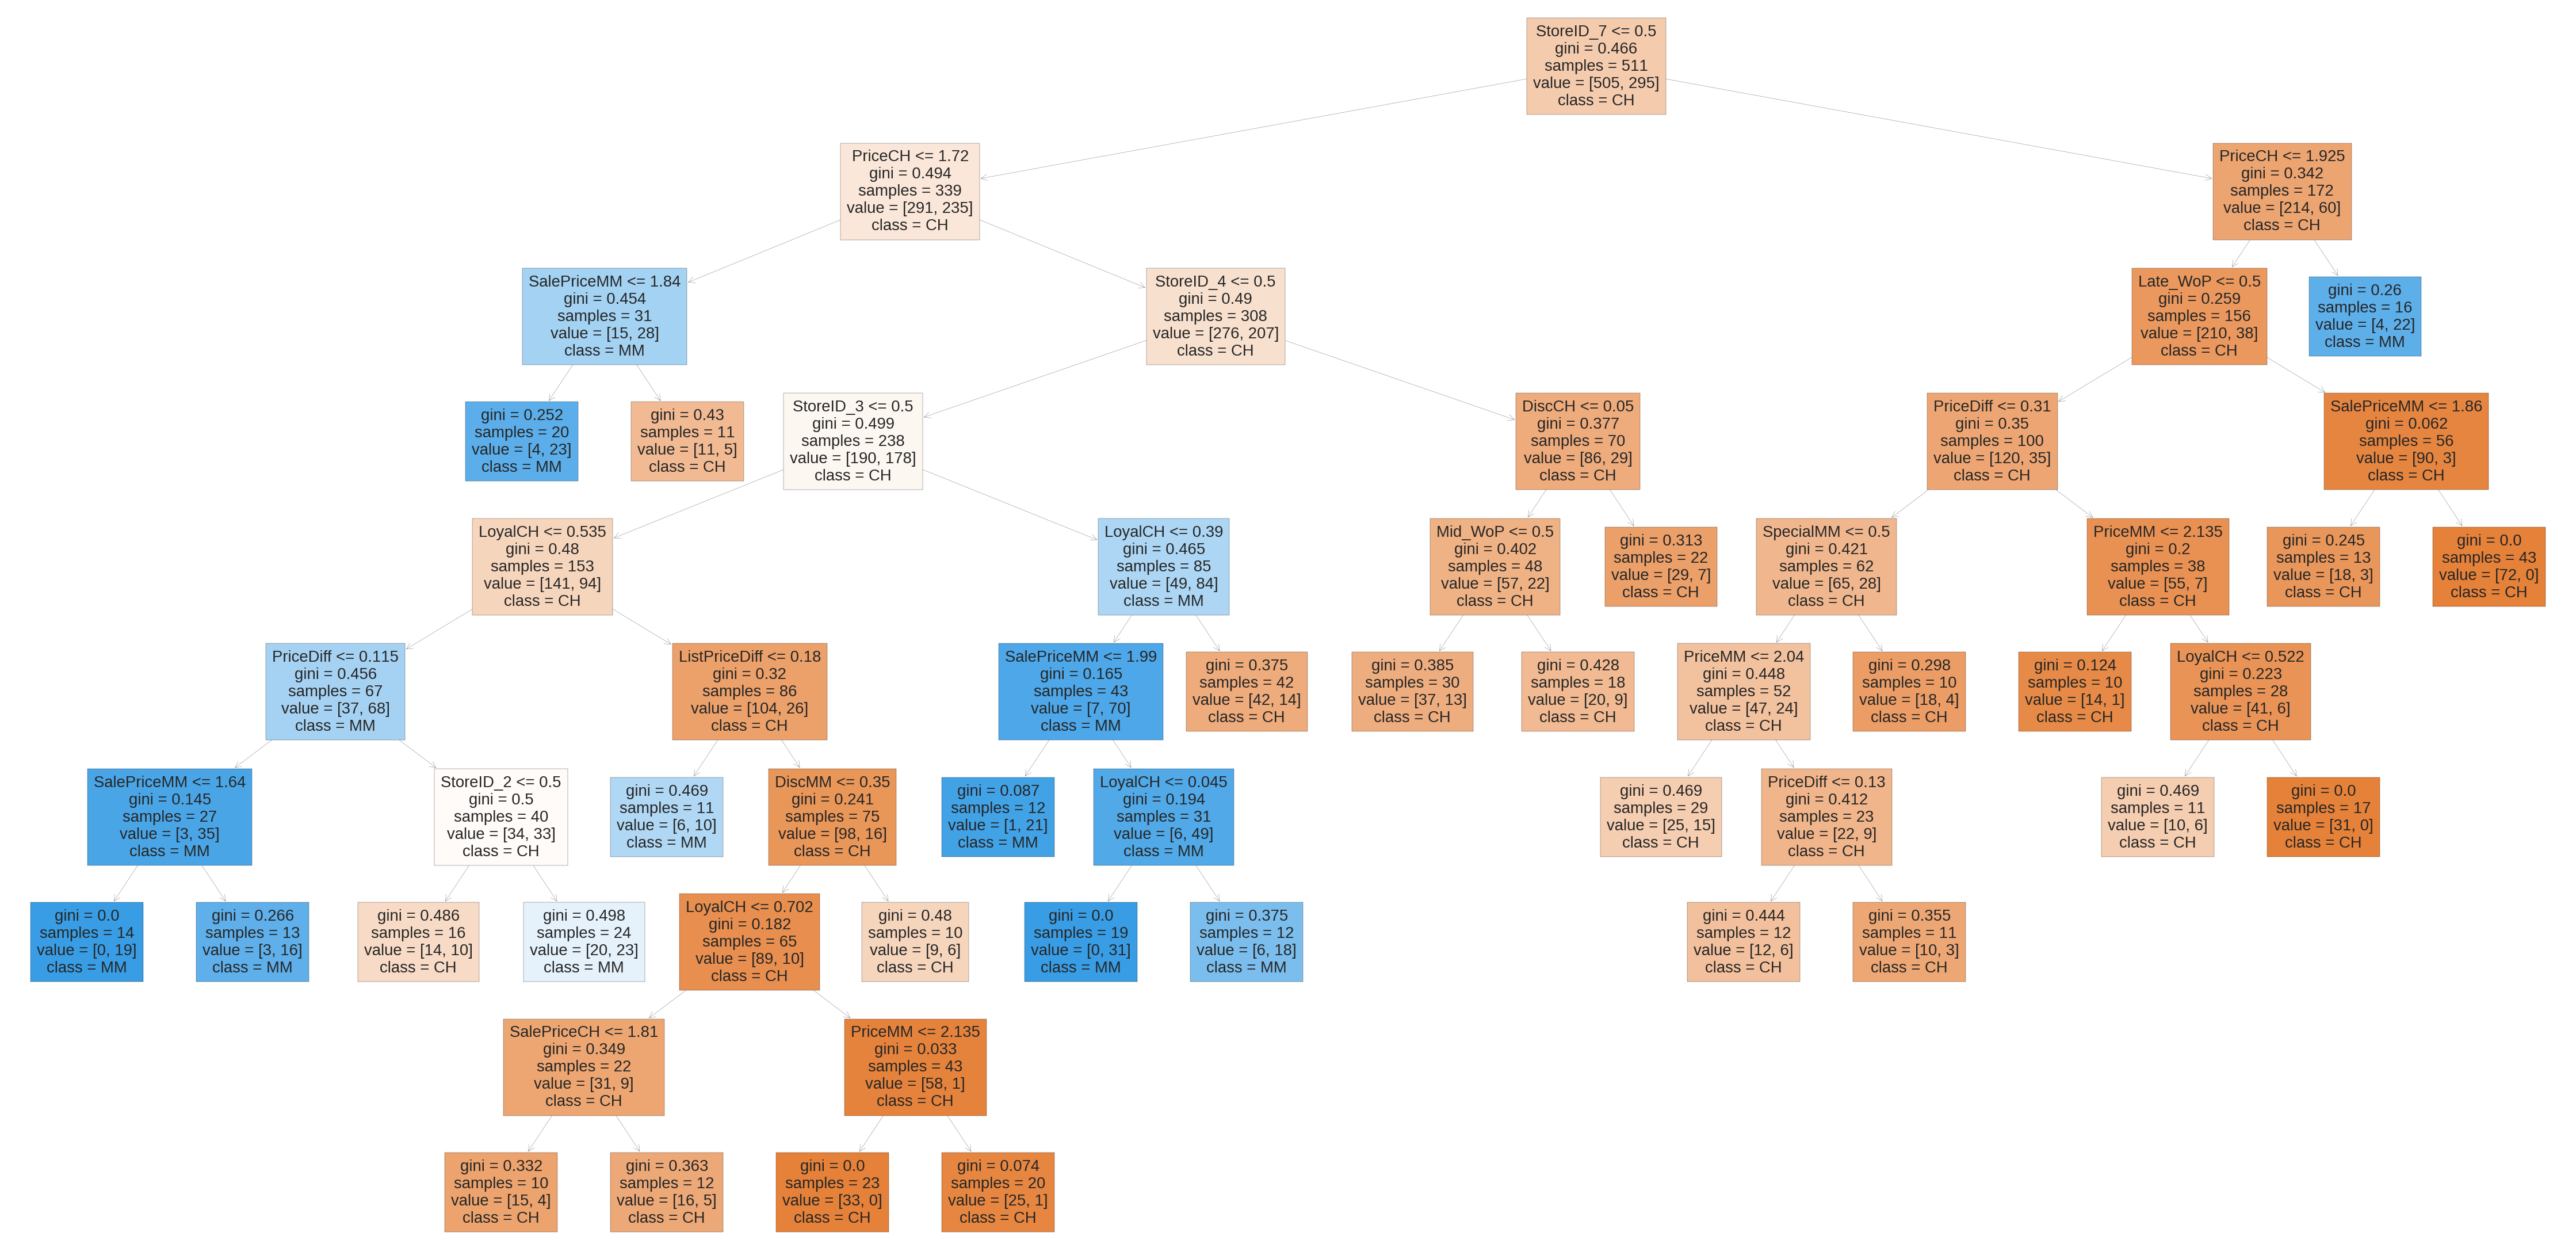

In [ ]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = rf_best.feature_names_in_, class_names= ['CH', 'MM'], filled=True);

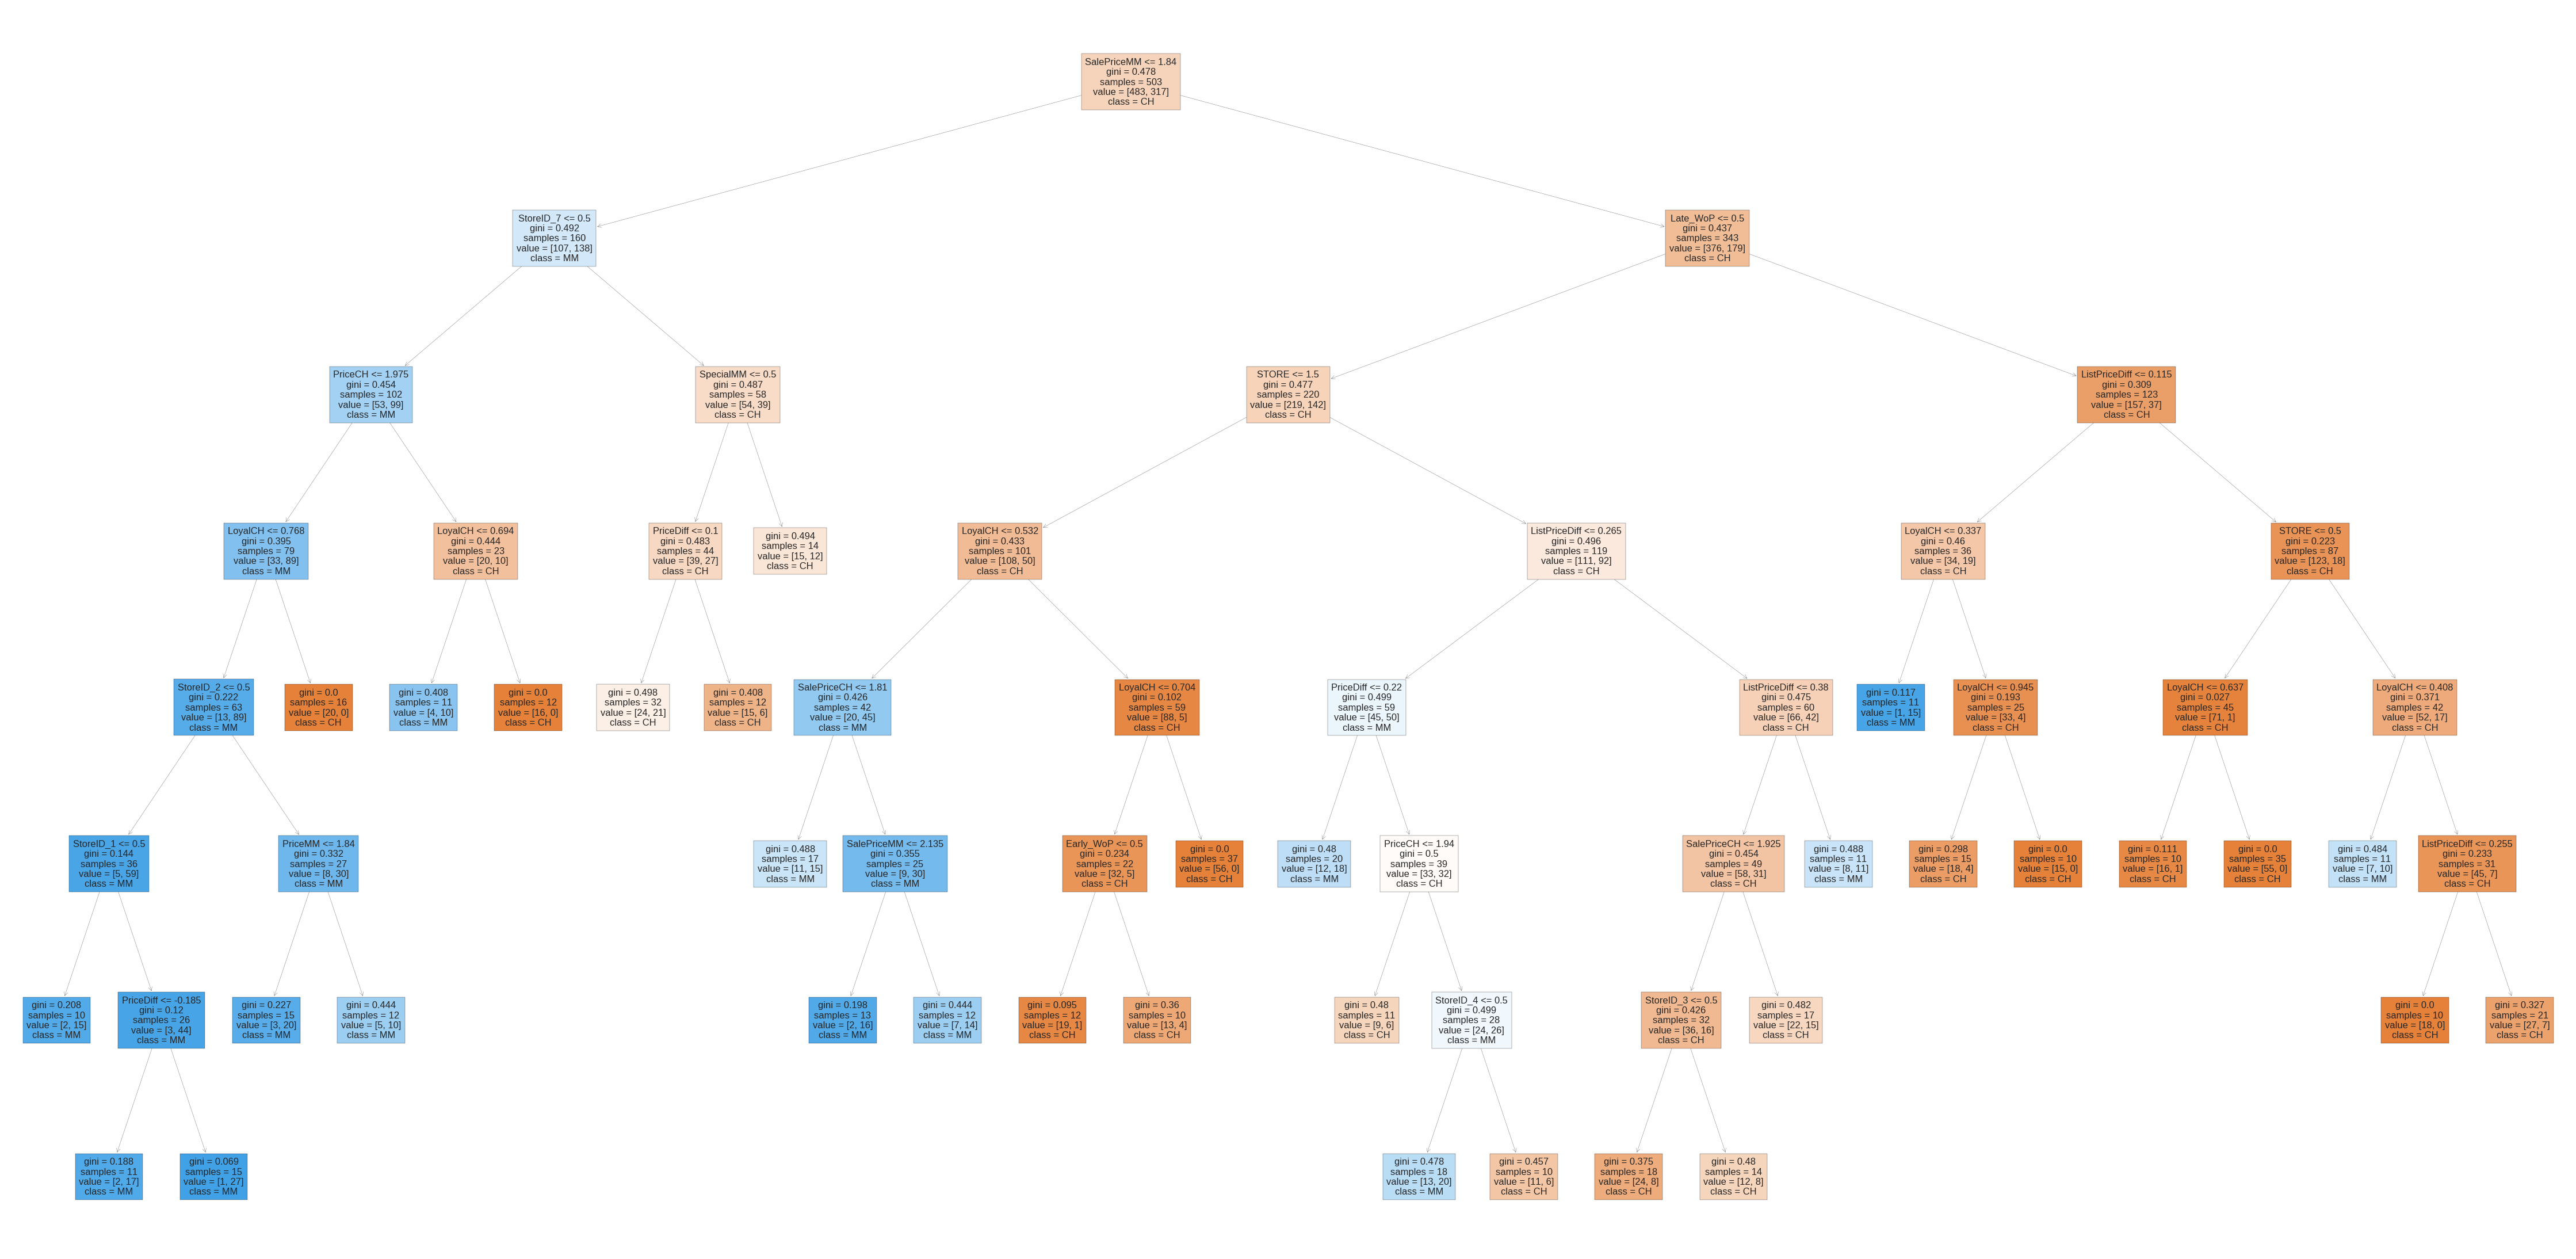

In [ ]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = rf_best.feature_names_in_, class_names= ['CH', 'MM'], filled=True);

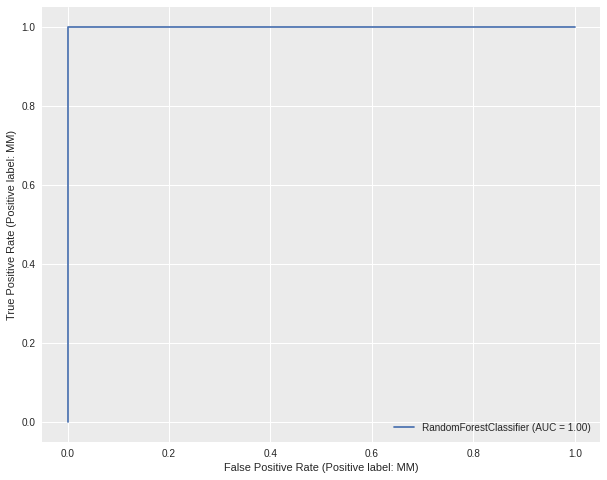

In [ ]:
RocCurveDisplay.from_estimator(rf_best, X_test1, y_pred_rf)

[Understanding AUC/ROC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

The two curves do not overlap,as a result, the model has an ideal measure of separability.It is perfectly able to distinguish between the two classes under study.

## ROC curves

### Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
params_lr = {
    'penalty': ['l1','l2', 'elasticnet', 'none'],
    'l1_ratio' : np.arange(0., 1.0, 0.1),
    'solver' : ['saga'],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001]
}

In [ ]:
# Instantiate the grid search model
grid_search_lr = GridSearchCV(estimator=lr,
                           param_grid=params_lr,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search_lr.fit(X_train1, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
CPU times: user 1.37 s, sys: 74.4 ms, total: 1.45 s
Wall time: 14.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga'],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_lr.best_score_

0.8412499999999999

In [ ]:
lr_best = grid_search_lr.best_estimator_
lr_best = LogisticRegression(l1_ratio=0.1, penalty='elasticnet', random_state=0, solver='saga',
                   tol=0.001)

In [ ]:
lr_best.fit(X_train1, y_train)
y_pred_lr = lr_best.predict(X_test1)

In [ ]:
confusion_matrix(y_test, y_pred_lr)

array([[133,  20],
       [ 29,  88]])

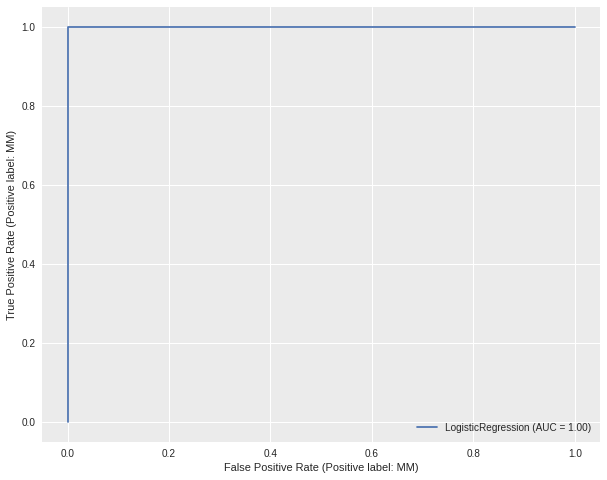

In [ ]:
RocCurveDisplay.from_estimator(lr_best, X_test1, y_pred_lr)

### We scale and perform the algorithm again

In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
columns = X_train1.columns
X_train1_norm = norm.fit_transform(X_train1)
X_test1_norm = norm.fit_transform(X_test1)

X_train1_norm = pd.DataFrame(X_train1_norm, columns = columns)
X_test1_norm = pd.DataFrame(X_test1_norm, columns = columns)

In [ ]:
lr_std = LogisticRegression(random_state=0)

In [ ]:
params_lr_std = {
    'penalty': ['elasticnet'],
    'l1_ratio' : np.arange(0., 1.1, 0.1),
    'solver' : ['saga'],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001]
}

In [ ]:
# Instantiate the grid search model
grid_search_lr = GridSearchCV(estimator = lr_std,
                           param_grid = params_lr_std,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
y_train_2 = y_train.apply(lambda x: 1 if x  == 'CH' else 0)

In [ ]:
%%time
grid_search_lr.fit(X_train1, y_train_2)

Fitting 4 folds for each of 55 candidates, totalling 220 fits
CPU times: user 604 ms, sys: 20.5 ms, total: 625 ms
Wall time: 5.59 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['elasticnet'], 'solver': ['saga'],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_lr.best_score_

0.8387499999999999

In [ ]:
grid_search_lr.best_estimator_

LogisticRegression(l1_ratio=0.6000000000000001, penalty='elasticnet',
                   random_state=0, solver='saga')

In [ ]:
lr_best_std = grid_search_lr.best_estimator_

In [ ]:
lr_best_std.fit(X_train1_norm, y_train_2)
y_pred_lr_std = lr_best_std.predict(X_test1_norm)

In [ ]:
confusion_matrix(y_test_2, y_pred_lr_std)

array([[ 89,  28],
       [ 20, 133]])

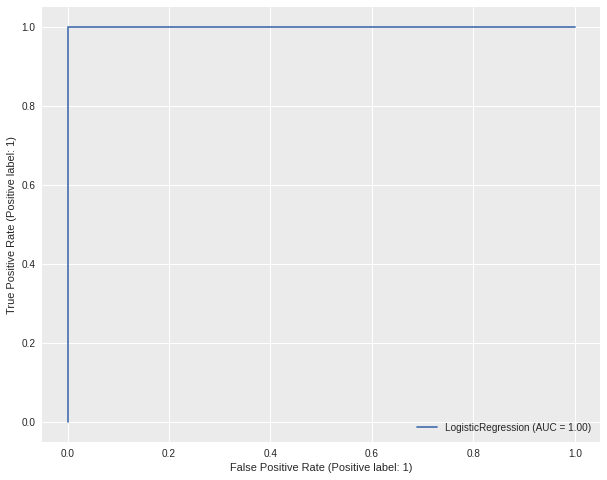

In [ ]:
RocCurveDisplay.from_estimator(lr_best_std, X_test1_norm, y_pred_lr_std)

In [ ]:
lr_best_std.score(X_train1_norm, y_train_2)

0.83625

### Naive Bayes: Gaussian Naive Bayes (GaussianNB)

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train1, y_train)

GaussianNB()

In [ ]:
nb.fit(X_train1, y_train)
y_pred_nb = nb.predict(X_test1)

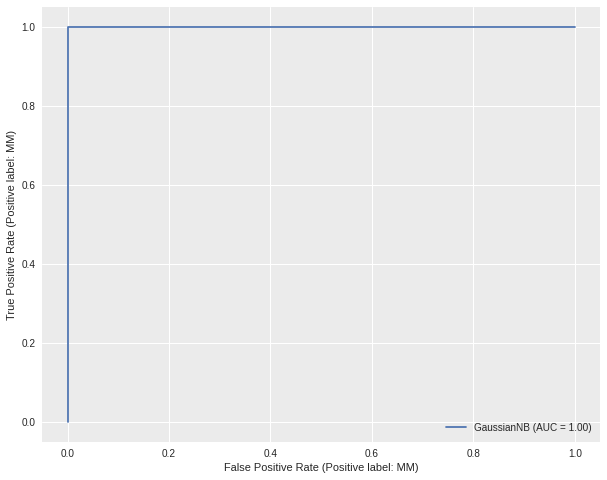

In [ ]:
RocCurveDisplay.from_estimator(nb, X_test1, y_pred_nb)

### Quadratic Discriminant Analysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()

In [ ]:
params_qda = {
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001]
}

In [ ]:
# Instantiate the grid search model
grid_search_qda = GridSearchCV(estimator = qda,
                           param_grid = params_qda,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search_qda.fit(X_train1, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
CPU times: user 96.3 ms, sys: 4.57 ms, total: 101 ms
Wall time: 288 ms


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GridSearchCV(cv=4, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_qda.best_score_

0.5975

In [ ]:
qda_best = grid_search_qda.best_estimator_
qda_best

QuadraticDiscriminantAnalysis(tol=0.1)

In [ ]:
qda_best.fit(X_train1, y_train)
y_pred_qda = qda_best.predict(X_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


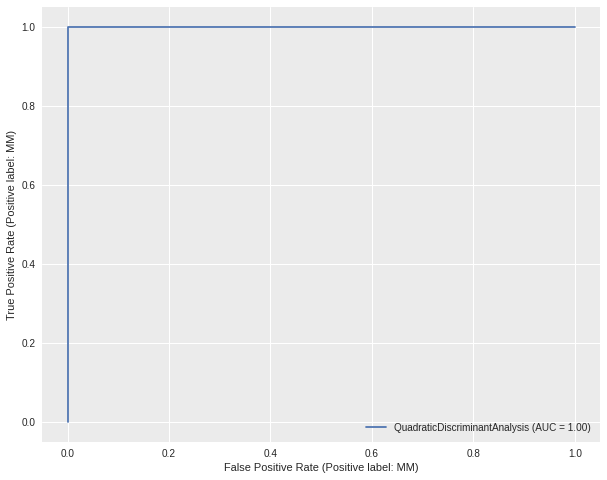

In [ ]:
RocCurveDisplay.from_estimator(qda_best, X_test1, y_pred_qda)

### ROCs

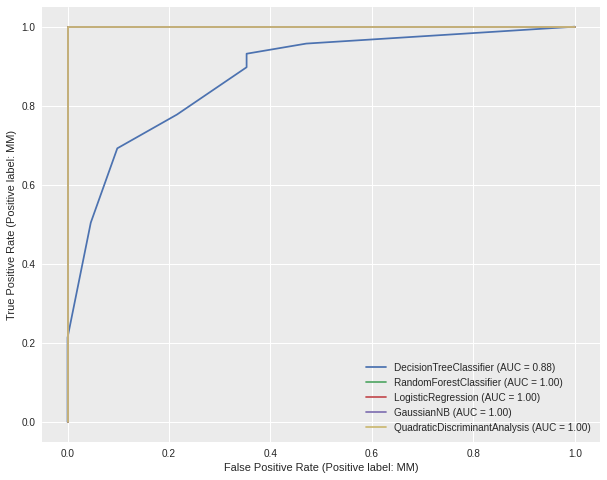

In [ ]:
disp = RocCurveDisplay.from_estimator(dt, X_test1, y_test)
RocCurveDisplay.from_estimator(rf_best, X_test1, y_pred_rf, ax = disp.ax_)
RocCurveDisplay.from_estimator(lr_best, X_test1, y_pred_lr, ax = disp.ax_)
RocCurveDisplay.from_estimator(nb, X_test1, y_pred_nb, ax = disp.ax_)
RocCurveDisplay.from_estimator(qda_best, X_test1, y_pred_qda, ax = disp.ax_);

## RF vs LR

In [ ]:
rf_best.feature_importances_, rf_best.feature_names_in_

(array([0.04677801, 0.02716052, 0.00739411, 0.01694433, 0.00268261,
        0.01107868, 0.53599658, 0.05998686, 0.02264015, 0.04626338,
        0.04757013, 0.0423458 , 0.00692311, 0.00266842, 0.01651073,
        0.00824583, 0.0734449 , 0.01005431, 0.00253074, 0.01278081]),
 array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
        'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype=object))

In [ ]:
lr_best.feature_names_in_, lr_best.coef_

(array(['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM',
        'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff',
        'ListPriceDiff', 'STORE', 'StoreID_1', 'StoreID_2', 'StoreID_3',
        'StoreID_4', 'StoreID_7', 'Early_WoP', 'Mid_WoP', 'Late_WoP'],
       dtype=object),
 array([[ 0.6469553 , -0.10769524, -0.14694354,  0.28577744,  0.02123684,
          0.28234276, -5.31326791, -0.44518355,  0.85888315, -1.36879446,
         -0.80626439,  0.14574157,  0.34817934,  0.28089613,  0.03226504,
         -0.23172493, -0.19395643,  0.28496172,  0.0451205 , -0.08324449]]))

In [ ]:
feat_impt_lr = pd.DataFrame( {'feat_impt_lr' : lr_best.feature_names_in_, 'value_lr' : lr_best.coef_[0]})
feat_impt_lr.sort_values(by = 'value_lr', inplace = True, ascending=False)

In [ ]:
feat_impt_lr[0:5]

feat_impt_lr  value_lr
8   SalePriceCH  0.858883
0       PriceCH  0.646955
12    StoreID_1  0.348179
3        DiscMM  0.285777
17    Early_WoP  0.284962

In [ ]:
feat_impt_lr['abs(value_lr)'] = feat_impt_lr['value_lr'].abs()

In [ ]:
feat_impt_lr_absolute = feat_impt_lr.copy()
feat_impt_lr_absolute.sort_values(by = 'abs(value_lr)', inplace = True, ascending=False)

In [ ]:
feat_impt_lr_absolute[0:5]

feat_impt_lr  value_lr  abs(value_lr)
6         LoyalCH -5.313268       5.313268
9       PriceDiff -1.368794       1.368794
8     SalePriceCH  0.858883       0.858883
10  ListPriceDiff -0.806264       0.806264
0         PriceCH  0.646955       0.646955

In [ ]:
feat_impt_rf[0:5]

feat_impt     value
6         LoyalCH  0.535997
16      StoreID_7  0.073445
7     SalePriceMM  0.059987
10  ListPriceDiff  0.047570
0         PriceCH  0.046778

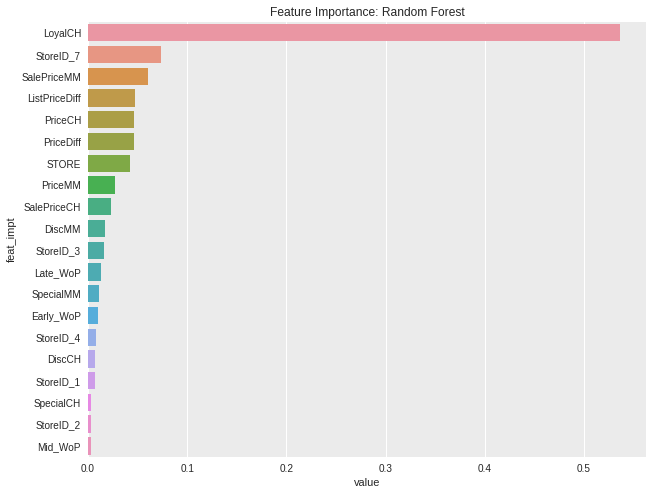

In [ ]:
sns.barplot(y = 'feat_impt', x = 'value', data = feat_impt_rf).set(title = 'Feature Importance: Random Forest');

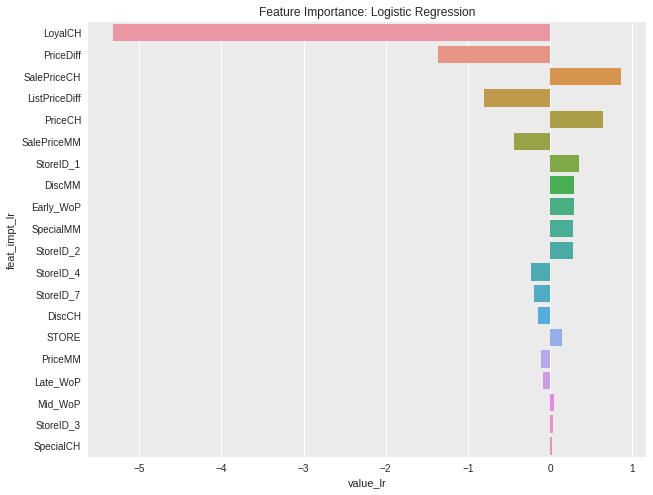

In [ ]:
sns.barplot(y = 'feat_impt_lr', x = 'value_lr', data = feat_impt_lr_absolute).set(title = 'Feature Importance: Logistic Regression');

From the above, logistic regression enabled us to identify some negative relationships between some predictors and the response variable. The random forest model could not identify this. For the top 5 features in both models, `LoyalCH`, `ListPriceDiff`, and `PriceCH` are common.

In [ ]:
y_train_2 = y_train.apply(lambda x: 1 if x  == 'CH' else 0)

In [ ]:
y_train_2 = pd.to_numeric(y_train_2, downcast='integer')

In [ ]:
y_train_2 = pd.DataFrame(y_train_2)

In [ ]:
y_train_2.reset_index(inplace = True)

In [ ]:
y_train_2.drop("index", axis = 1, inplace=True)

In [ ]:
y_train_2

purchase
0           1
1           0
2           0
3           1
4           0
..        ...
795         1
796         1
797         0
798         1
799         0

[800 rows x 1 columns]

In [ ]:
y_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   purchase  800 non-null    int8 
dtypes: int8(1)
memory usage: 928.0 bytes


In [ ]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 743 to 684
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PriceCH        800 non-null    float64
 1   PriceMM        800 non-null    float64
 2   DiscCH         800 non-null    float64
 3   DiscMM         800 non-null    float64
 4   SpecialCH      800 non-null    int64  
 5   SpecialMM      800 non-null    int64  
 6   LoyalCH        800 non-null    float64
 7   SalePriceMM    800 non-null    float64
 8   SalePriceCH    800 non-null    float64
 9   PriceDiff      800 non-null    float64
 10  ListPriceDiff  800 non-null    float64
 11  STORE          800 non-null    int64  
 12  StoreID_1      800 non-null    uint8  
 13  StoreID_2      800 non-null    uint8  
 14  StoreID_3      800 non-null    uint8  
 15  StoreID_4      800 non-null    uint8  
 16  StoreID_7      800 non-null    uint8  
 17  Early_WoP      800 non-null    uint8  
 18  Mid_WoP 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
columns = X_train1.columns
X_train1_norm = norm.fit_transform(X_train1)
X_test1_norm = norm.fit_transform(X_test1)

X_train1_norm = pd.DataFrame(X_train1_norm, columns = columns)
X_test1_norm = pd.DataFrame(X_test1_norm, columns = columns)

In [ ]:
X_train1_norm

PriceCH   PriceMM  DiscCH  DiscMM  SpecialCH  SpecialMM   LoyalCH  \
0      0.750  0.666667    0.20     0.5        1.0        0.0  0.691105   
1      0.425  0.666667    0.20     0.0        0.0        0.0  0.163842   
2      0.750  0.733333    0.00     0.0        0.0        1.0  0.129006   
3      0.425  0.733333    0.74     0.0        1.0        0.0  0.932952   
4      0.425  0.816667    0.00     0.0        0.0        0.0  0.358565   
..       ...       ...     ...     ...        ...        ...       ...   
795    0.750  0.666667    0.00     0.5        0.0        0.0  0.951793   
796    0.500  0.666667    0.26     0.0        0.0        0.0  0.680041   
797    0.250  0.166667    0.00     0.0        0.0        0.0  0.600035   
798    0.425  0.733333    0.54     0.0        1.0        0.0  0.600035   
799    0.425  0.816667    0.00     0.0        0.0        0.0  0.131071   

     SalePriceMM  SalePriceCH  PriceDiff  ListPriceDiff  STORE  StoreID_1  \
0       0.454545     0.714286   0.358779       0.227273   0.75        0.0   
1       0.818182     0.528571   0.763359       0.522727   0.00        0.0   
2       0.854545     0.857143   0.618321       0.318182   0.25        1.0   
3       0.854545     0.142857   1.000000       0.613636   0.00        0.0   
4       0.900000     0.671429   0.755725       0.727273   0.00        0.0   
..           ...          ...        ...            ...    ...        ...   
795     0.454545     0.857143   0.282443       0.227273   1.00        0.0   
796     0.818182     0.528571   0.763359       0.454545   0.50        0.0   
797     0.545455     0.571429   0.511450       0.000000   1.00        0.0   
798     0.854545     0.285714   0.923664       0.613636   0.00        0.0   
799     0.900000     0.671429   0.755725       0.727273   0.00        0.0   

     StoreID_2  StoreID_3  StoreID_4  StoreID_7  Early_WoP  Mid_WoP  Late_WoP  
0          0.0        1.0        0.0        0.0        0.0      0.0       1.0  
1          0.0        0.0        0.0        1.0        0.0      1.0       0.0  
2          0.0        0.0        0.0        0.0        0.0      0.0       1.0  
3          0.0        0.0        0.0        1.0        0.0      0.0       1.0  
4          0.0        0.0        0.0        1.0        0.0      1.0       0.0  
..         ...        ...        ...        ...        ...      ...       ...  
795        0.0        0.0        1.0        0.0        0.0      0.0       1.0  
796        1.0        0.0        0.0        0.0        0.0      1.0       0.0  
797        0.0        0.0        1.0        0.0        1.0      0.0       0.0  
798        0.0        0.0        0.0        1.0        0.0      0.0       1.0  
799        0.0        0.0        0.0        1.0        0.0      1.0       0.0  

[800 rows x 20 columns]

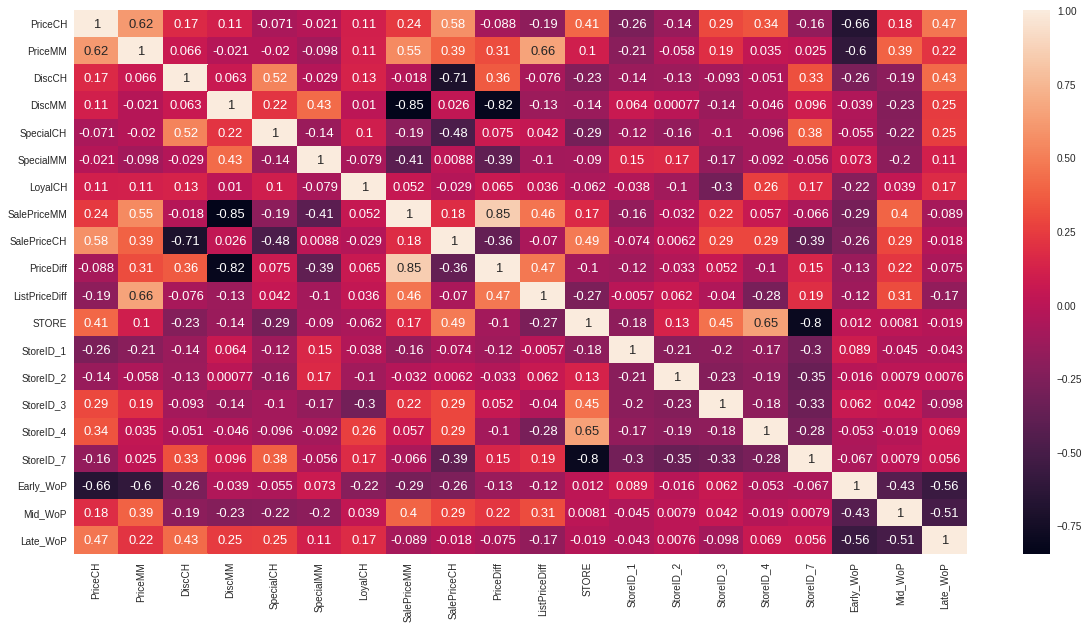

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train1_norm.corr(), annot=True, annot_kws={"fontsize":13})

We remove some highly correlated variables.

In [ ]:
X_train1_norm.drop(["STORE","StoreID_1","DiscMM"], axis = 1, inplace=True)

In [ ]:
X_test1_norm.drop(["STORE","StoreID_1","DiscMM"], axis = 1, inplace=True)

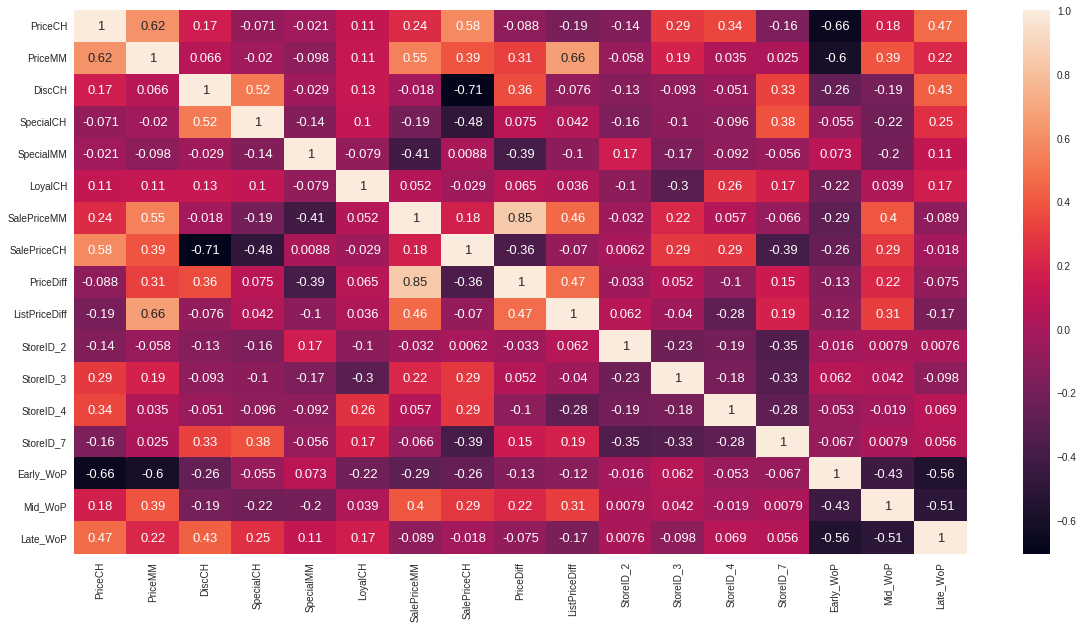

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train1_norm.corr(), annot=True, annot_kws={"fontsize":13})

In [ ]:
logit_mod = sm.Logit(y_train_2, X_train1_norm)

In [ ]:
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.378847
         Iterations 12


In [ ]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  800
Model:                          Logit   Df Residuals:                      786
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                  0.4273
Time:                        12:51:15   Log-Likelihood:                -303.08
converged:                       True   LL-Null:                       -529.25
Covariance Type:            nonrobust   LLR p-value:                 1.885e-88
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
PriceCH           1.2790   1.29e+07   9.95e-08      1.000   -2.52e+07    2.52e+07
PriceMM           0.0637   1.49e+07   4.29e-09      1.000   -2.91e+07    2.91e+07
DiscCH           -2.1231   6.78e+06  -3.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


From the above, only `LoyalCH` and `StoreID_7` appears to be statistically relevant taking a 95% confidence interval.        

A logistic regression model allows us to establish a relationship between a binary outcome variable and a group of predictor variables. It models the logit-transformed probability as a linear relationship with the predictor variables.  More formally, let $Y$ be the binary outcome variable indicating MM/CH with $\{0,1\}$ and $p$ be the probabiility of $y$ to be 1, $p = P(Y=1)$. Let $x_1, \cdots, x_k$ be a set of predictor variables.  Then the logistic regression of $Y$ on $x_1, \cdots, x_k$ estimates parameter values for $\beta_0, \beta_1, \cdots, \beta_k$ via maximum likelihood method of the following equation:

We interprete the log odds as follows:

$$logit(p) = log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k.$$



The above is equivalent to:

$${p} = \frac{exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k)}{1+exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k)}.$$

Here $p$ is the overall probability of being in `CH` class ( CH = 1).

If we consider our result in the model, coef(LoyalCH) = 6.3598.


$$p = \dfrac{ \exp(6.3598) }  {1 + \exp(6.3598) } = 0.99827 $$


Thiis implies that we are 99.8% certain that customers that are loyal to the CH product will buy class CH (CH=1).

On the other hand, Looking at StoreID_7 with  coeff = 0.7486, we have that;


$$p = \dfrac{ \exp(0.7486) }  {1 + \exp(0.7486) } = 0.6789 $$.

We are 67.9% sure that customers who patronize store 7 at the expense of store 1 will buy the CH product. Furthermore, the odds ratio for StoreID_7 is:
$$e^{0.7486} = 2.114$$

Furthermore, If we consider our result in the model, coef(LoyalCH) = 6.3598 and StoreID_7 with  coeff = 0.7486. We have a customer that is loyal to CH and buys at store 7.


$$p = \dfrac{ \exp(6.3598*1 + 0.7486*1) }  {1 + \exp(6.3598*1 + 0.7486*1) } = 0.999182 $$

In [4]:
import math
math.e**(6.3598*1 + 0.7486*1)/( 1 + math.e**(6.3598*1 + 0.7486*1))

0.999182465838685

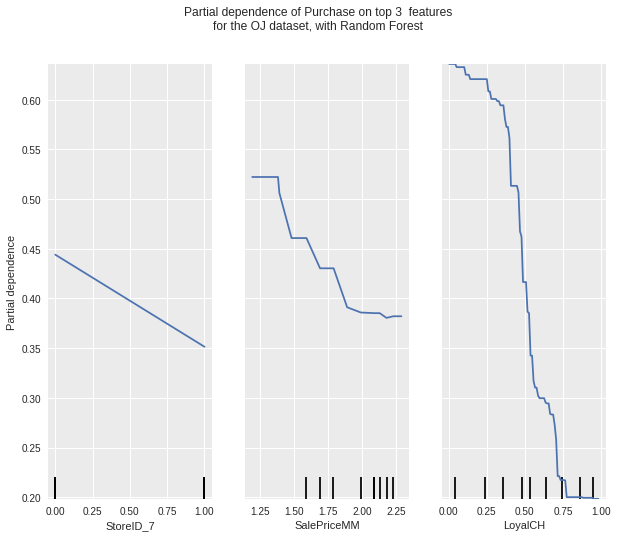

In [ ]:
display = PartialDependenceDisplay.from_estimator(rf_best, X_test1, features = ['StoreID_7', 'SalePriceMM', 'LoyalCH']);

display.figure_.suptitle(
    "Partial dependence of Purchase on top 3  features\n"
    "for the OJ dataset, with Random Forest"
)
display.figure_.subplots_adjust(hspace=0.05);

From the above partial dependency plot, from StoreID_7, we see a linear relationship which shows that purchasing at store 7 declines purchases.

Furthermore, `SalePriceMM` gives us a non-linear relationship which shows a decline in purchase as SalePriceMM increases.

Lastly, as LoyalCH increases, we also have a decline in purchase.